In [4]:
# Importation des librairies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.collections import LineCollection
from sklearn.metrics import silhouette_score
import seaborn as sns
import geopandas as gpd
from sklearn import preprocessing, cluster, metrics, decomposition
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from functions import *

In [5]:
# Importation des données.
df_final = pd.read_csv('data\df_final.csv', index_col=0)
df_complet = pd.read_csv('data\df_final_num.csv', index_col=0)

In [6]:
# Retrait de  la ligne dont l'index est France
df_complet = df_complet.drop(['France'], axis=0)

In [7]:
# Création d'un DataFrame sans les pays à Exclure

df_sans = df_complet.copy()   

# pays à Exlure

pays = ['Chine, continentale', 'Inde', 'Brésil', "États-Unis d'Amérique",]

df_sans = df_complet.drop(pays, axis=0)


In [8]:
# Création d'un array numpy contenant les valeurs de notre dataset
X = df_complet.values
X2 = df_sans.values

# Stockage des noms des pays
pays = df_complet.index
pays2 = df_sans.index

# Stockage des noms des variables
variables = df_complet.columns
variables2 = df_sans.columns



In [9]:
# Instanciation de l'objet StandardScaler pour normaliser nos données
scaler = preprocessing.StandardScaler()

# Application de la normalisation (centrage-réduction) à nos données
X_scaled = scaler.fit_transform(X)


# Instanciation de l'objet StandardScaler
scaler = preprocessing.StandardScaler()

# Transformation – centrage-réduction
X_scaled2 = scaler.fit_transform(X2)

# ACP

In [10]:

# Instanciation de l'objet PCA pour effectuer une analyse en composantes principales avec touts les variables
pca = decomposition.PCA()

# Application de l'ACP sur nos données centrées et réduites
pca.fit(X_scaled)

    
# Instanciation de l'objet PCA avec toutes nos variables comme composantes initiales
pca2 = decomposition.PCA()

# Application de l'ACP sur nos données centrées et réduites
pca2.fit(X_scaled2)


PCA()

### Choix du nombre de composantes principales

In [11]:
# Calcul de la variance expliquée et de la somme cumulative de la variance expliquée
variance = pca.explained_variance_ratio_*100
variance_cumulee = np.cumsum(variance)

# Création d'un DataFrame avec ces données
df_variance = pd.DataFrame({'Variance Expliquée': variance, 
                            'Variance Cumulée': variance_cumulee})

# Composantes en indices
df_variance.index = ['Composante ' + str(i+1) for i in range(len(variance))]

# Calcul des valeurs propres
valeurs_propres = pca.explained_variance_

# Ajout de la colonne des valeurs propres au DataFrame
df_variance['Valeurs Propres'] = valeurs_propres

# Affichage du DataFrame
df_variance


Variance Expliquée  Variance Cumulée  Valeurs Propres
Composante 1            23.662311         23.662311         3.336556
Composante 2            16.499693         40.162004         2.326575
Composante 3            12.239338         52.401341         1.725835
Composante 4             9.368979         61.770320         1.321093
Composante 5             7.458033         69.228353         1.051636
Composante 6             7.197395         76.425748         1.014885
Composante 7             5.726029         82.151777         0.807411
Composante 8             4.811766         86.963543         0.678494
Composante 9             4.304988         91.268531         0.607034
Composante 10            3.434911         94.703442         0.484347
Composante 11            2.737054         97.440495         0.385944
Composante 12            1.707980         99.148475         0.240837
Composante 13            0.840371         99.988846         0.118498
Composante 14            0.011154        100.000000         0.001573

In [12]:
# Calcul de la variance expliquée et de la somme cumulative de la variance expliquée
variance2 = pca2.explained_variance_ratio_*100
variance_cumulee2 = np.cumsum(variance2)

# Création d'un DataFrame avec ces données
df_variance2 = pd.DataFrame({'Variance Expliquée': variance2, 
                            'Variance Cumulée': variance_cumulee2})

# Composantes en indices
df_variance2.index = ['Composante ' + str(i+1) for i in range(len(variance2))]

# Calcul des valeurs propres
valeurs_propres2 = pca2.explained_variance_

# Ajout de la colonne des valeurs propres au DataFrame
df_variance2['Valeurs Propres'] = valeurs_propres2

# Affichage du DataFrame
df_variance2

Variance Expliquée  Variance Cumulée  Valeurs Propres
Composante 1            23.875425         23.875425         3.367319
Composante 2            18.685908         42.561333         2.635405
Composante 3            11.886396         54.447729         1.676422
Composante 4             9.065105         63.512834         1.278516
Composante 5             8.571025         72.083859         1.208832
Composante 6             6.486577         78.570436         0.914848
Composante 7             5.664647         84.235083         0.798925
Composante 8             4.794323         89.029407         0.676177
Composante 9             3.433301         92.462707         0.484223
Composante 10            2.413094         94.875801         0.340336
Composante 11            2.308736         97.184536         0.325617
Composante 12            1.529685         98.714221         0.215742
Composante 13            1.171563         99.885784         0.165234
Composante 14            0.114216        100.000000         0.016109

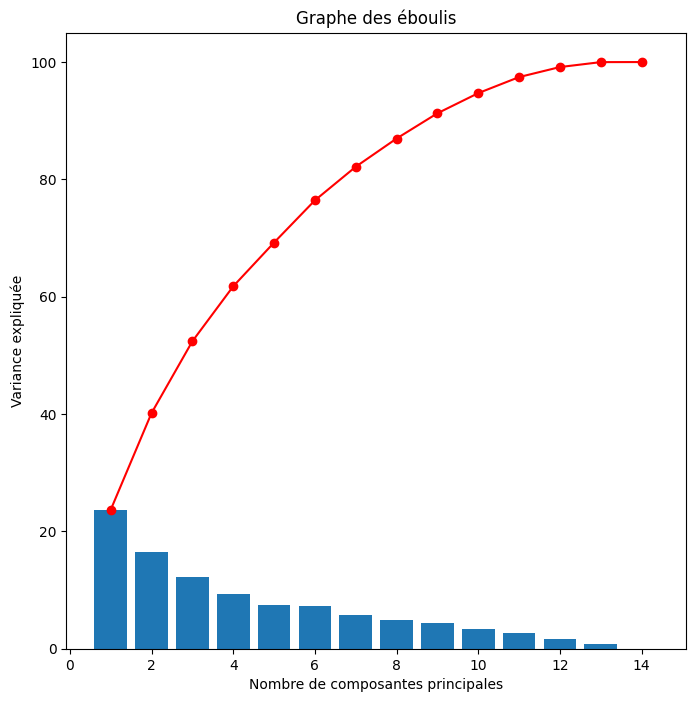

In [13]:
# Création d'un graphe des éboulis
plt.figure(figsize=(8, 8))

# Ajout des barres pour chaque composante
plt.bar(range(1, len(variance)+1), variance)

# Ajout d'une ligne pour la variance cumulée expliquée
plt.plot(range(1, len(variance)+1), variance_cumulee, 'r-o')

# Ajout des titres et des labels
plt.title("Graphe des éboulis")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée")

# Affichage du graphe
plt.show()

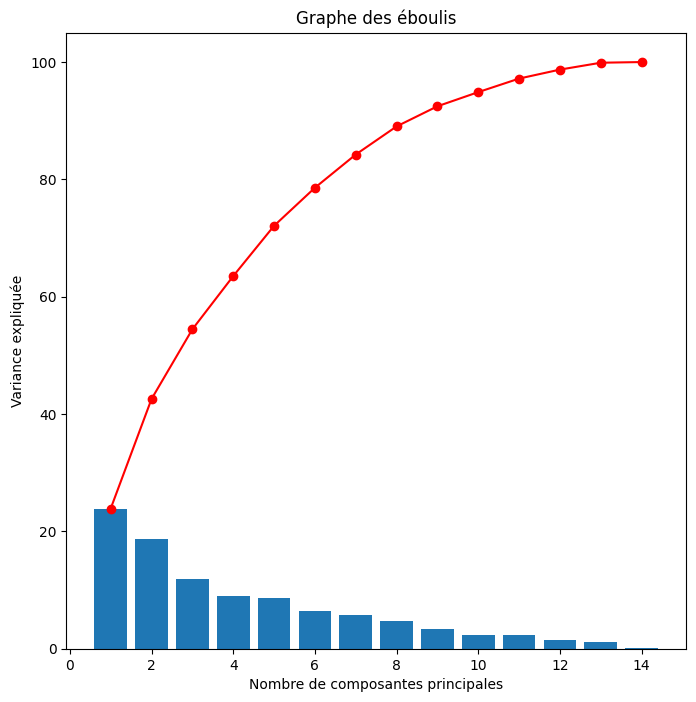

In [14]:
# Création d'un graphe des éboulis
plt.figure(figsize=(8, 8))

# Ajout des barres pour chaque composante
plt.bar(range(1, len(variance2)+1), variance2)

# Ajout d'une ligne pour la variance cumulée expliquée
plt.plot(range(1, len(variance2)+1), variance_cumulee2, 'r-o')

# Ajout des titres et des labels
plt.title("Graphe des éboulis")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée")

# Affichage du graphe
plt.show()

### Interprétation des composantes principales

In [15]:
# Instanciation de l'objet PCA avec 7 composantes principales
pca = decomposition.PCA(n_components=7)
df = pca.fit(X_scaled)
# Transformation PCA sur les données standardisées
scores_acp = pca.transform(X_scaled)

# Instanciation de l'objet PCA avec 7 composantes principales
pca2 = decomposition.PCA(n_components=7)
df2 = pca2.fit(X_scaled2)
# Transformation PCA sur les données standardisées
scores_acp2 = pca.transform(X_scaled2)



In [16]:
# Création d'un DataFrame contenant les poids de chaque variable dans chaque composante principale
df_composantes = pd.DataFrame(data=df.components_,
                            columns=variables,
                            index=['Composante 1', 'Composante 2', 'Composante 3', 'Composante 4', 'Composante 5', 'Composante 6', 'Composante 7'])

In [17]:
df_composantes2 = pd.DataFrame(data=df2.components_,
                            columns=variables2,
                            index=['Composante 1', 'Composante 2', 'Composante 3', 'Composante 4', 'Composante 5', 'Composante 6', 'Composante 7'])



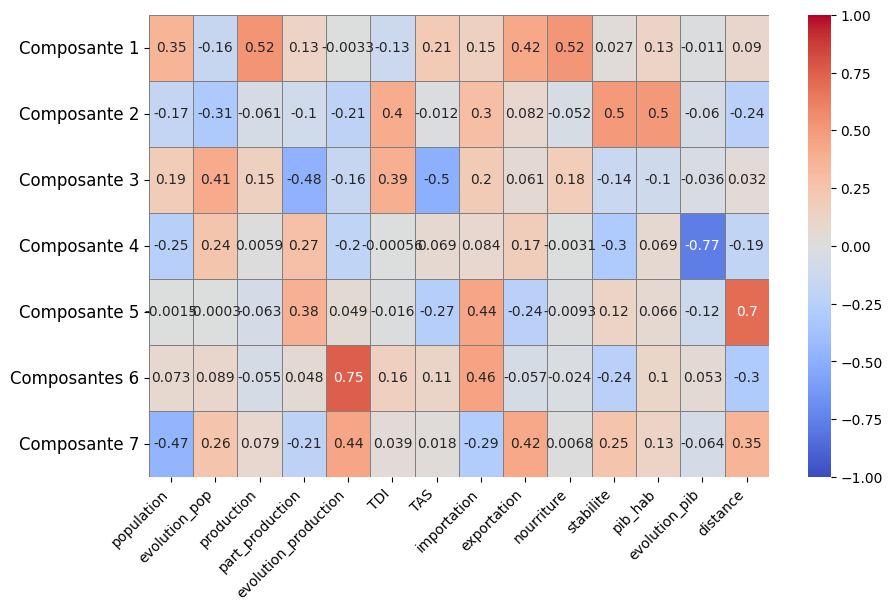

In [18]:
# Création d'une heatmap pour visualiser les poids des variables dans chaque composante principale
plt.figure(figsize=(10, 6))
sns.heatmap(df_composantes,
            vmin=-1,
            vmax=1,
            cmap="coolwarm",
            linewidth=0.6,
            linecolor='gray',
            annot=True)

# Rotation des labels de l'axe x et alignement sur les ticks pour une meilleure lisibilité
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=45, ha='right', fontsize=10)
# Modification des labels de l'axe y (nom des composantes principales) et rotation pour une meilleure lisibilité
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5],
           ["Composante 1", "Composante 2", "Composante 3", "Composante 4", "Composante 5", "Composantes 6", "Composante 7"],
           rotation=0,
           fontsize=12)

plt.show()

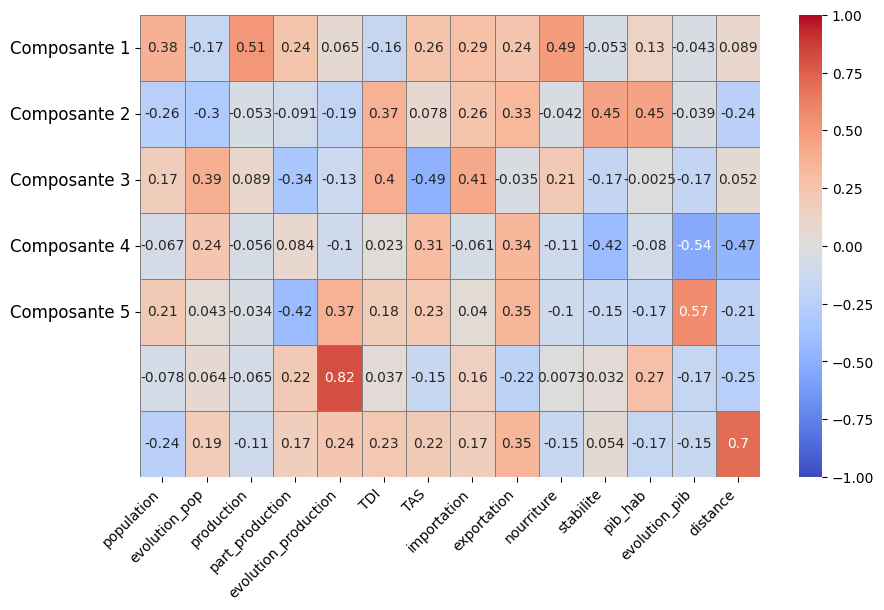

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_composantes2,
            vmin=-1,
            vmax=1,
            cmap="coolwarm",
            linewidth=0.6,
            linecolor='gray',
            annot=True)

# Rotation des labels de l'axe x et alignement sur les ticks
labels = plt.gca().get_xticklabels()
plt.setp(labels, rotation=45, ha='right', fontsize=10)

plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5,] ,
           ["Composante 1", "Composante 2", "Composante 3", "Composante 4", "Composante 5"],
           rotation=0,
           fontsize=12)

plt.show()

## Projection des données sur les composantes principales

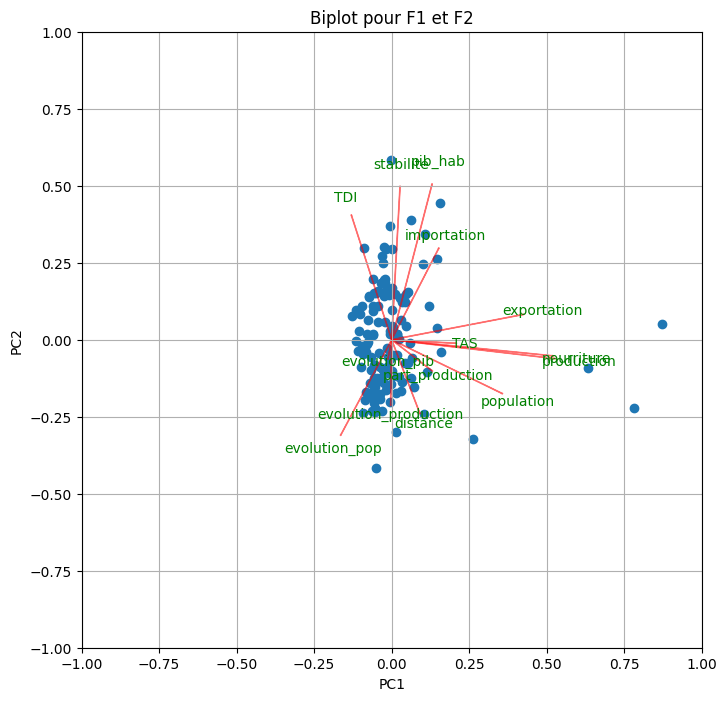

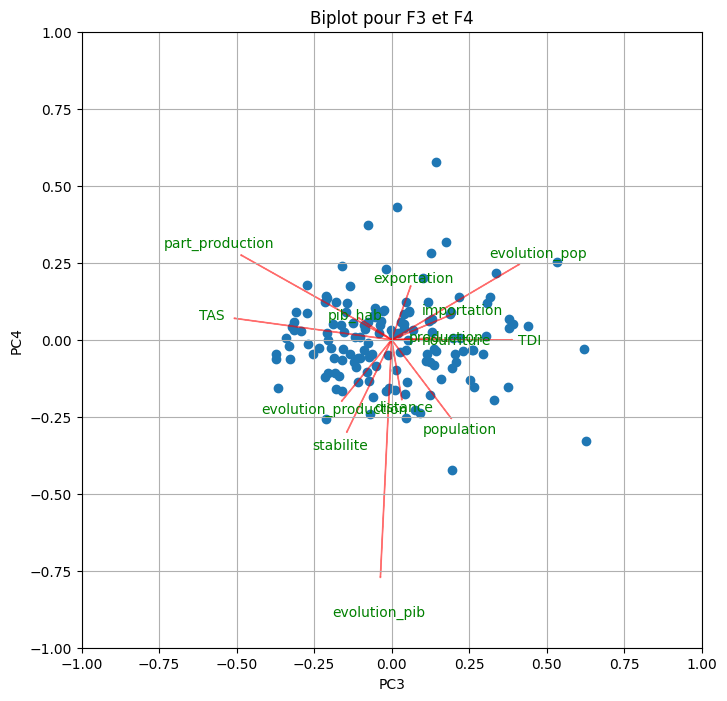

In [20]:
# Projection sur le premier plan factoriel F1/F2
plt.figure(figsize=(8,8))
biplot(scores_acp, np.transpose(pca.components_), 0, 1, labels=variables)
plt.title('Biplot pour F1 et F2')
plt.show()

# Projection sur le deuxième plan factoriel F3/F4
plt.figure(figsize=(8,8))
biplot(scores_acp, np.transpose(pca.components_), 2, 3, labels=variables)
plt.title('Biplot pour F3 et F4')
plt.show()

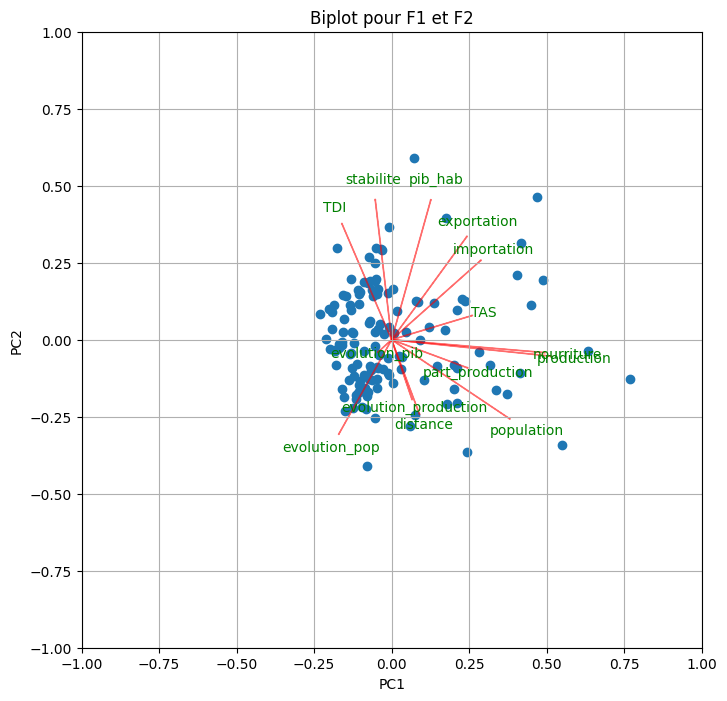

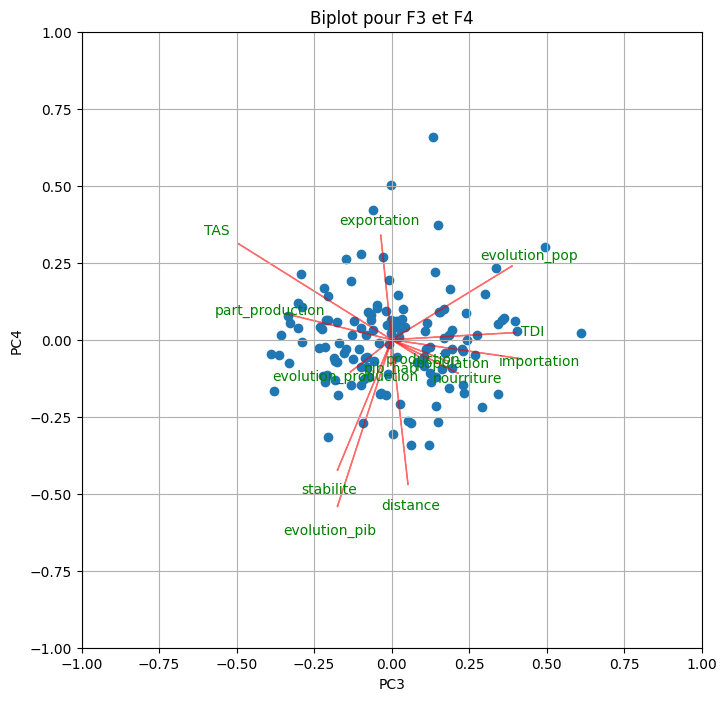

In [21]:
# Projection sur le premier plan factoriel F1/F2
plt.figure(figsize=(8,8))
biplot(scores_acp2, np.transpose(pca2.components_), 0, 1, labels=variables2)
plt.title('Biplot pour F1 et F2')
plt.show()

# Projection sur le deuxième plan factoriel F3/F4
plt.figure(figsize=(8,8))
biplot(scores_acp2, np.transpose(pca2.components_), 2, 3, labels=variables2)
plt.title('Biplot pour F3 et F4')
plt.show()

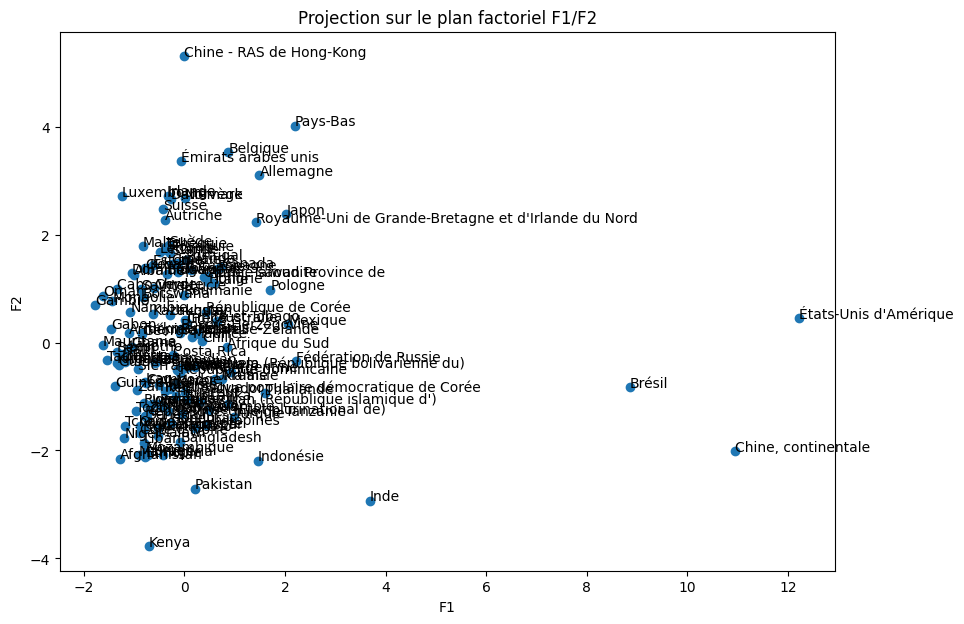

In [17]:
projection_acp(scores_acp, 2, pays)

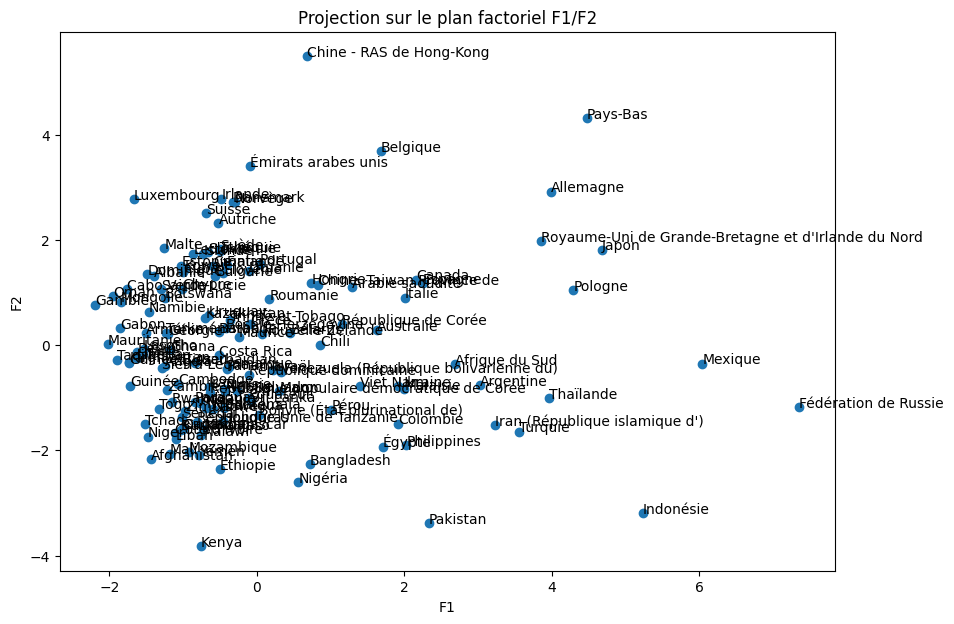

In [18]:
projection_acp(scores_acp2, 2, pays2)

**********************************

# Clustering Ascendant Hiérarchique

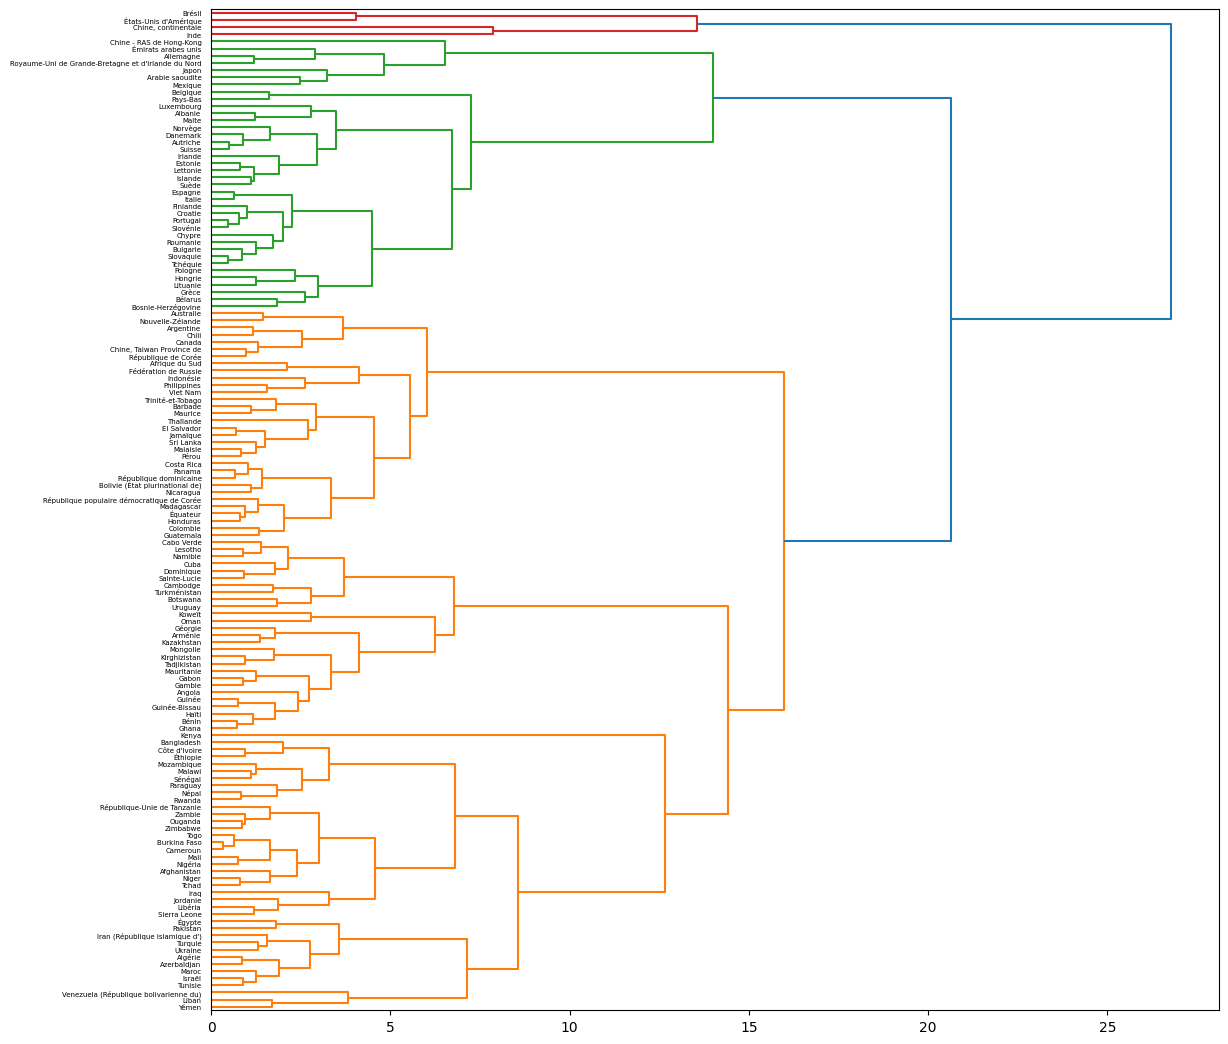

In [19]:

# Appliquer la méthode de clustering hiérarchique
Z = linkage(scores_acp, method='ward', metric='euclidean')

# Tracer le dendrogramme
plt.figure(figsize=(13,13))
dendrogram(Z,
           labels=pays,
           distance_sort='descending',
           orientation="right",
           show_leaf_counts=True)
plt.show()

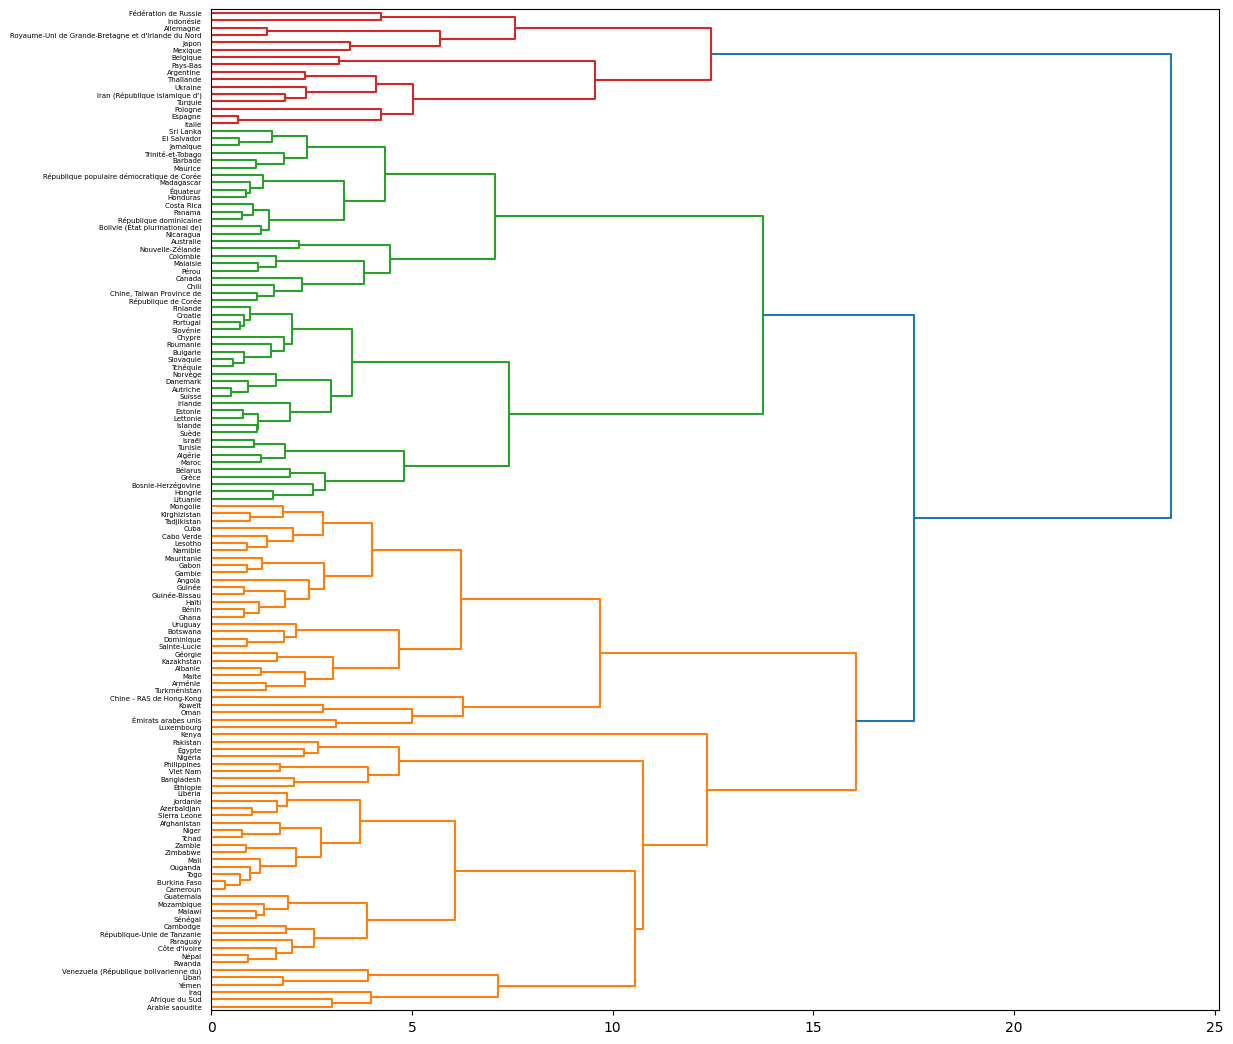

In [20]:
# Appliquer la méthode de clustering hiérarchique
O = linkage(scores_acp2, method='ward', metric='euclidean')

# Tracer le dendrogramme
plt.figure(figsize=(13,13))
dendrogram(O,
           labels=pays2,
           distance_sort='descending',
           orientation="right",
           show_leaf_counts=True)
plt.show()

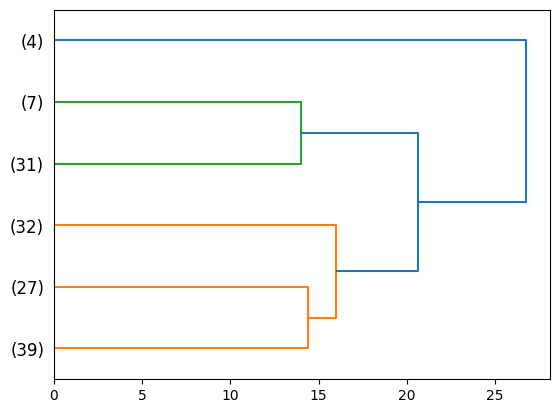

In [21]:
dendrogram(Z, p=6, truncate_mode='lastp', distance_sort='descending',
           orientation="right",
           show_leaf_counts=True)

plt.show()

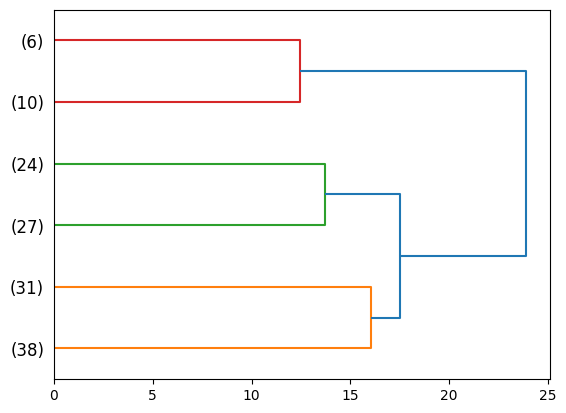

In [22]:
dendrogram(O, p=6, truncate_mode='lastp', distance_sort='descending',
           orientation="right",
           show_leaf_counts=True)

plt.show()

In [23]:

clusters_cah = fcluster(Z, 6, criterion='maxclust') # 6 clusters
df_complet['clusters_cah'] = clusters_cah # Ajout des clusters au DataFrame

clusters_cah2 = fcluster(O, 6, criterion='maxclust') # 6 clusters
df_sans['clusters_cah2'] = clusters_cah2 # Ajout des clusters au DataFrame




## Analyse des clusters

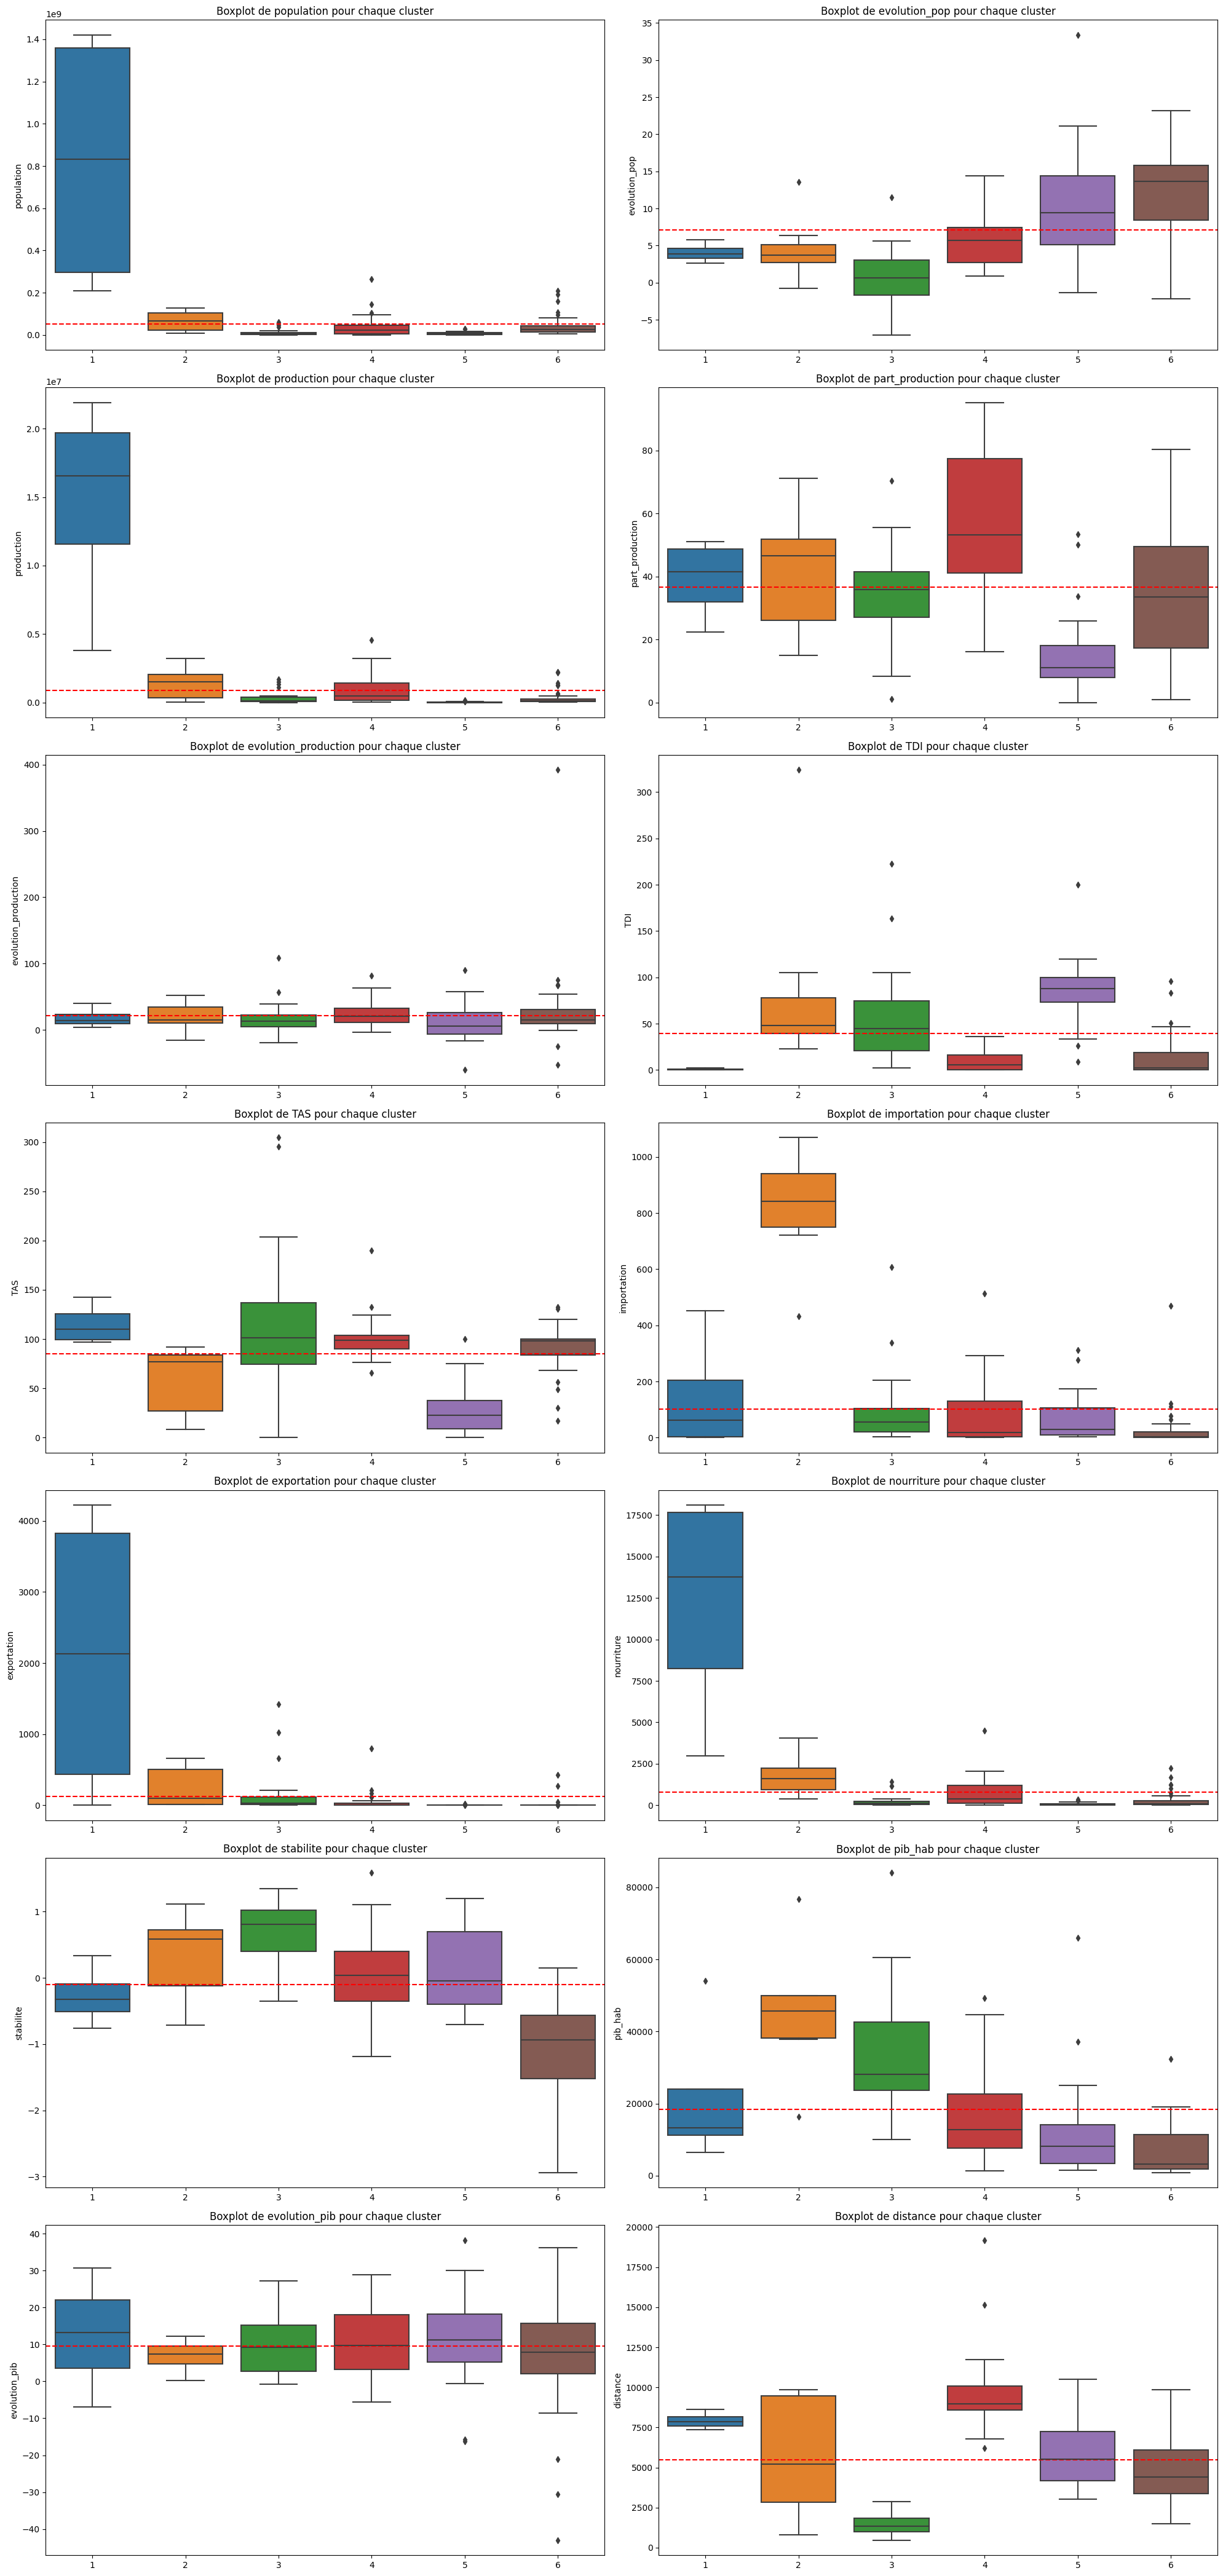

In [24]:
generation_boxplots(df_complet, clusters_cah)

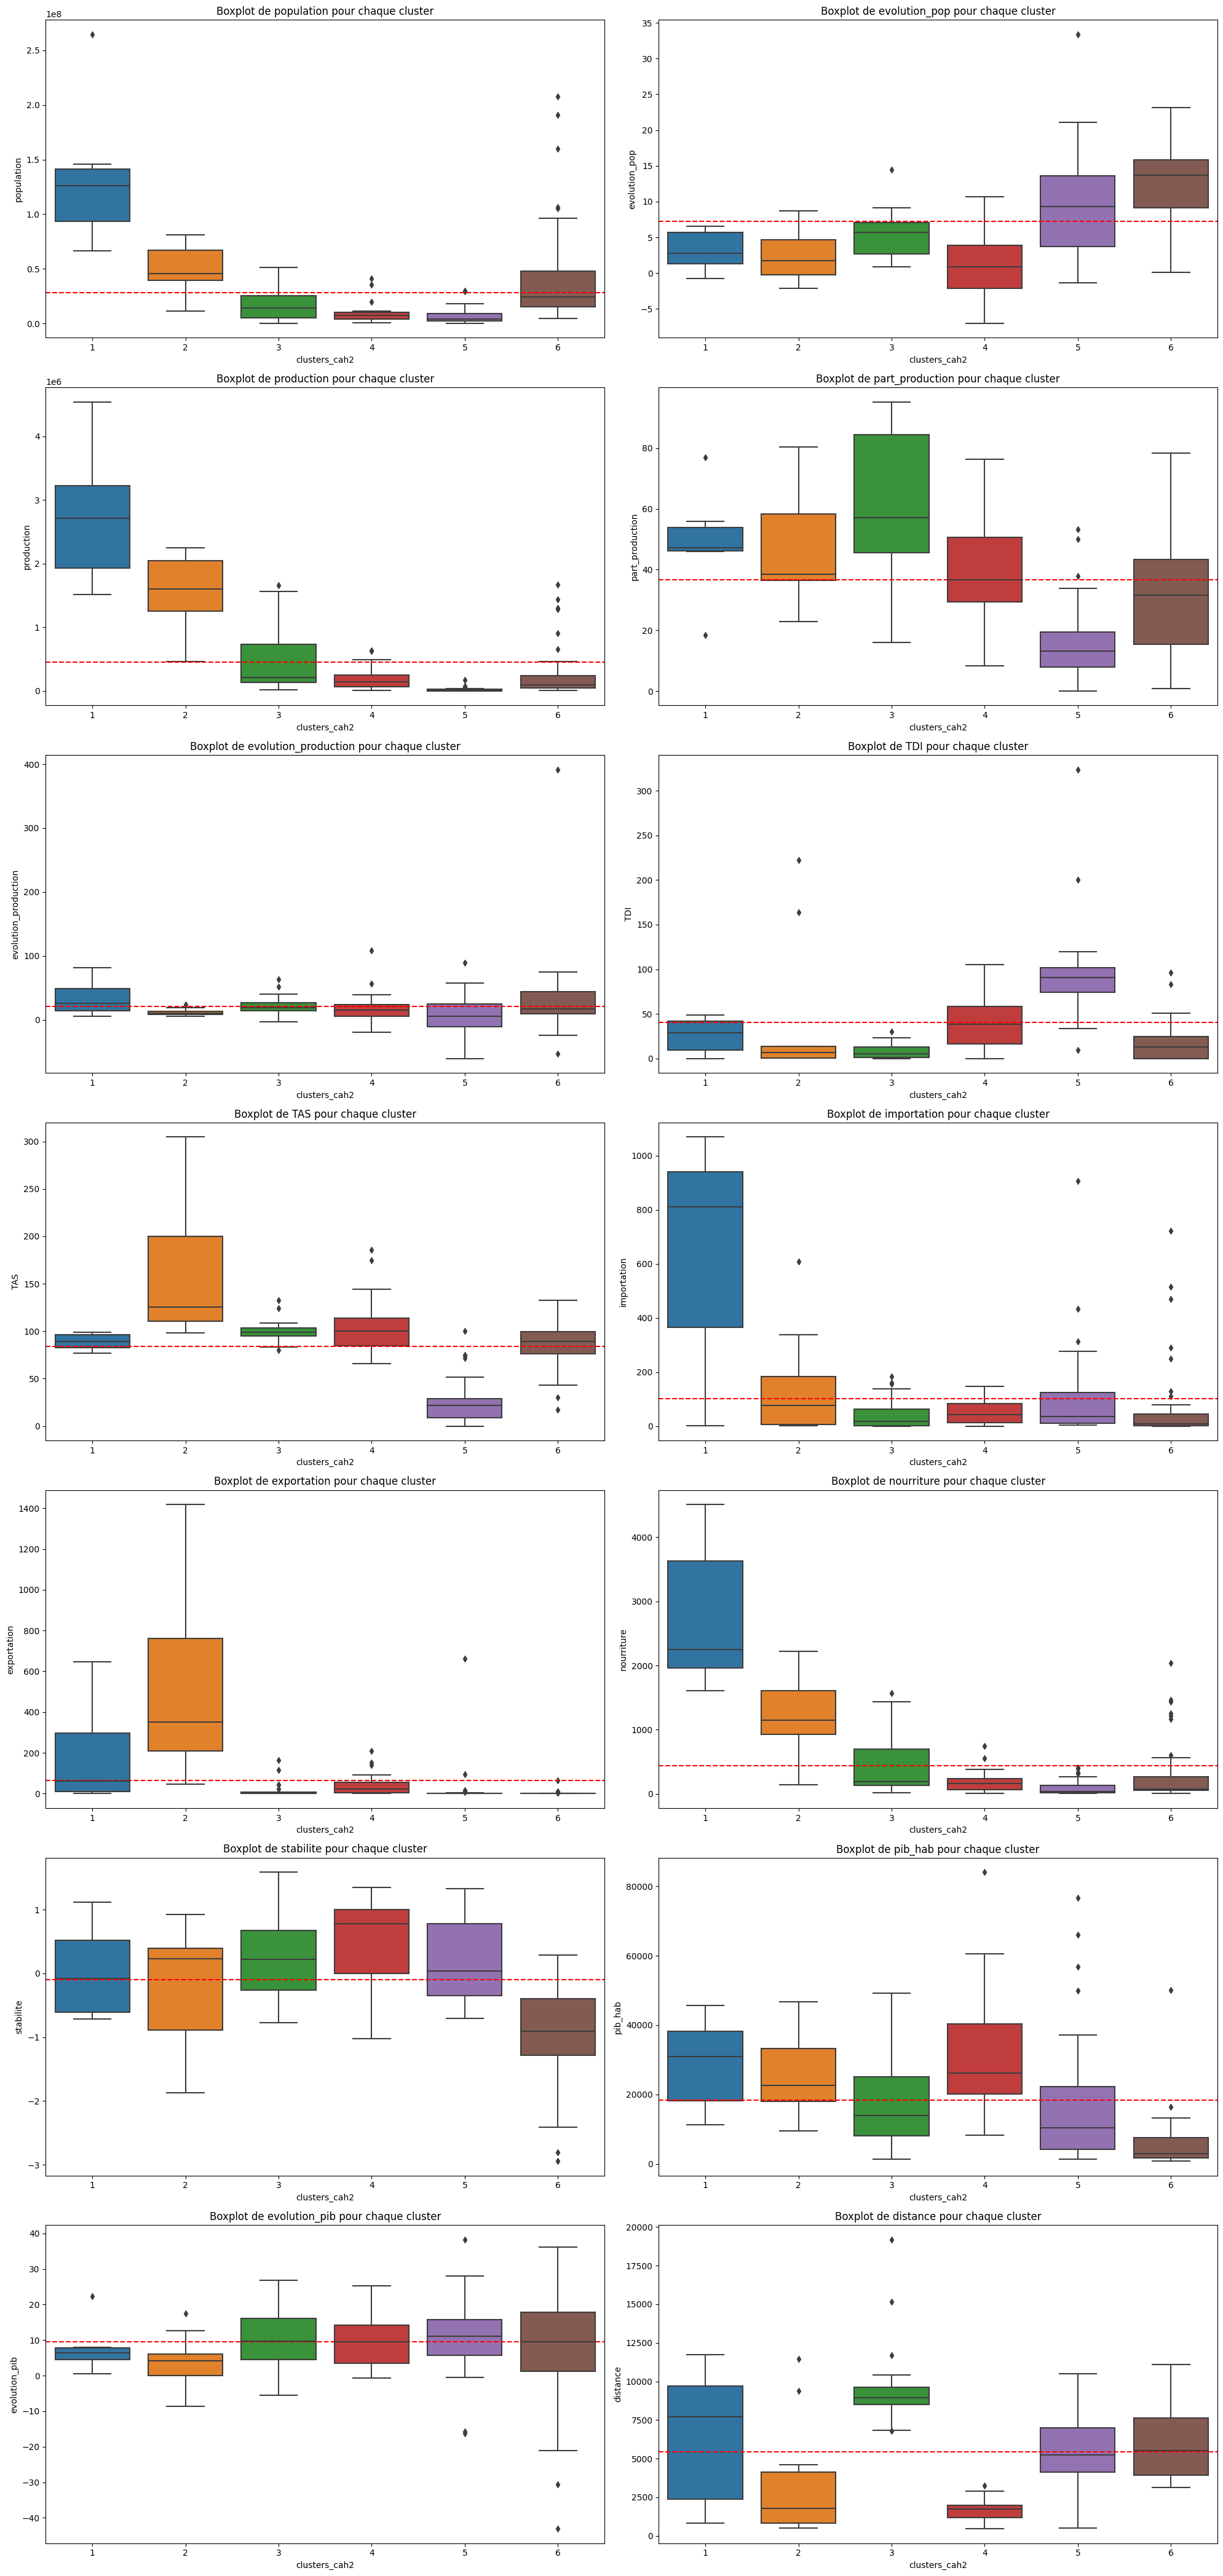

In [25]:
generation_boxplots(df_sans, 'clusters_cah2')

c:\Users\samir\Desktop\[OPENCLASSROOMS]\009 Produisez une étude de marché avec R ou Python\[LIVRABLES]\functions.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  col for col in df.columns if "cluster" not in col or col == cluster_col


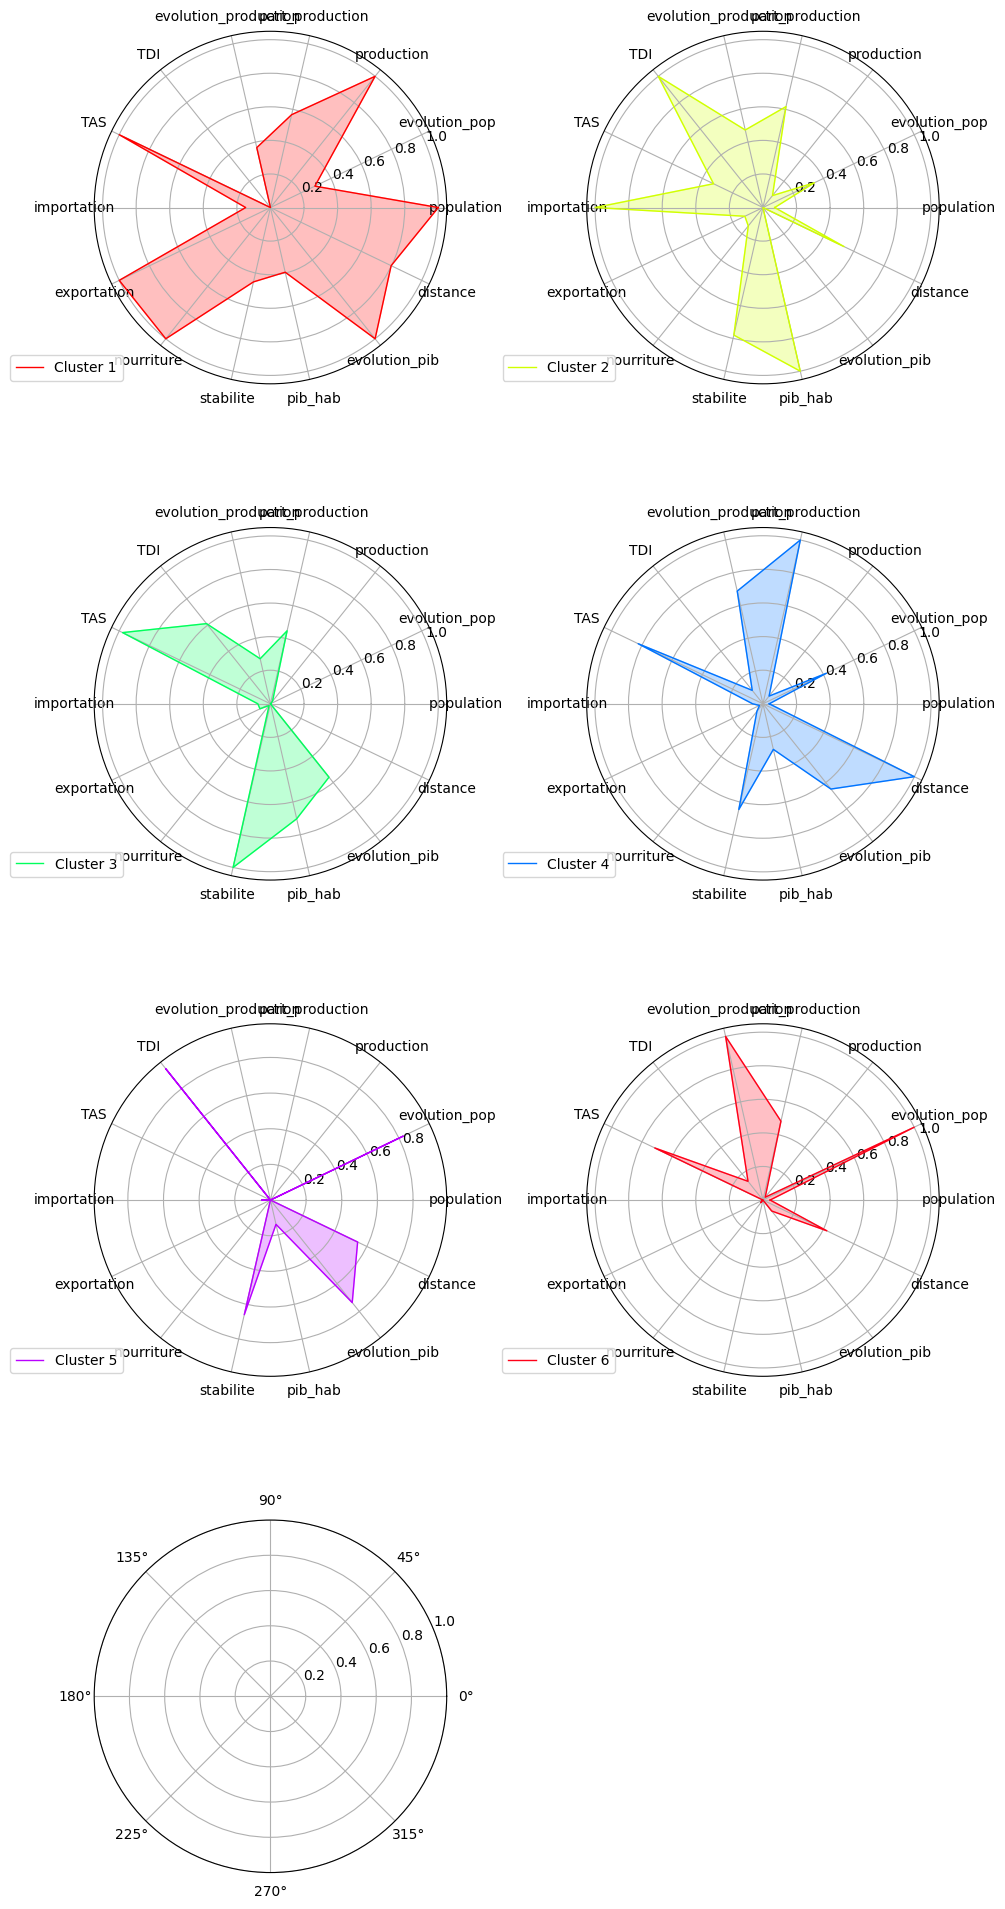

In [26]:
radar_clustering(df_complet, clusters_cah)

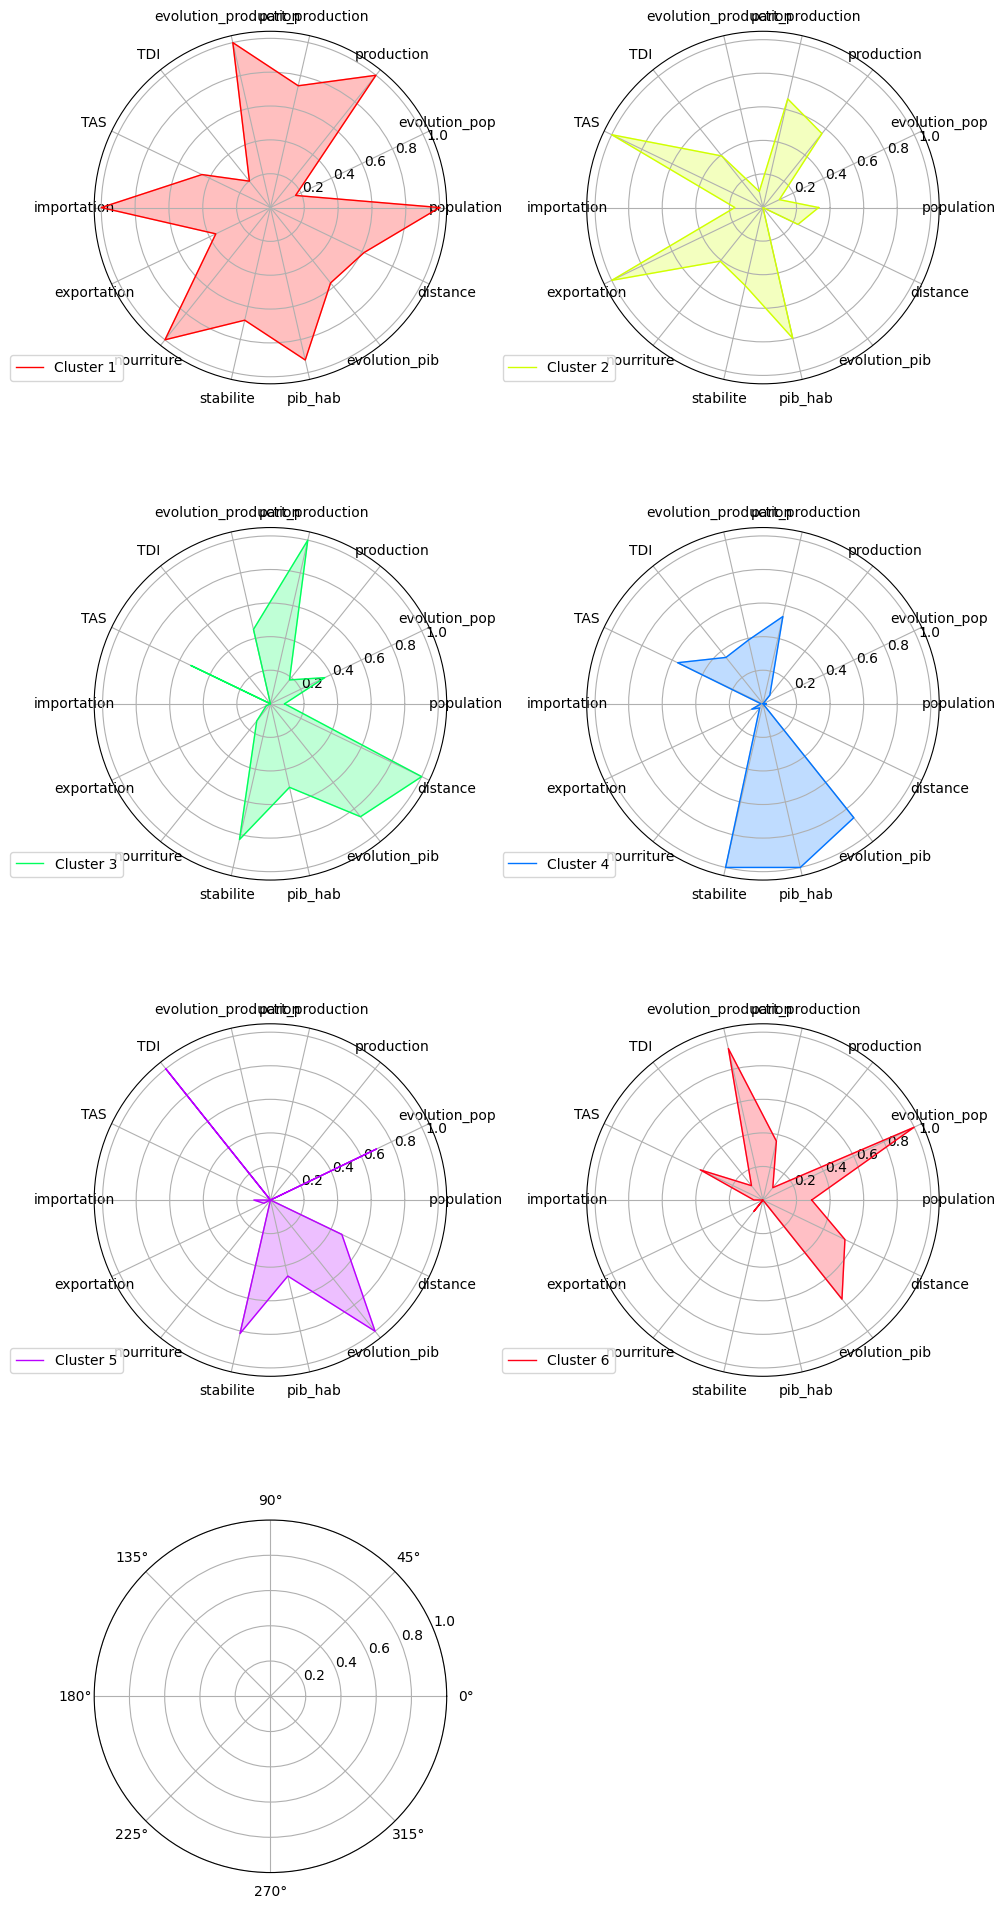

In [27]:
radar_clustering(df_sans, 'clusters_cah2')

## Projections des clusters issus de la CAH sur les composantes principales

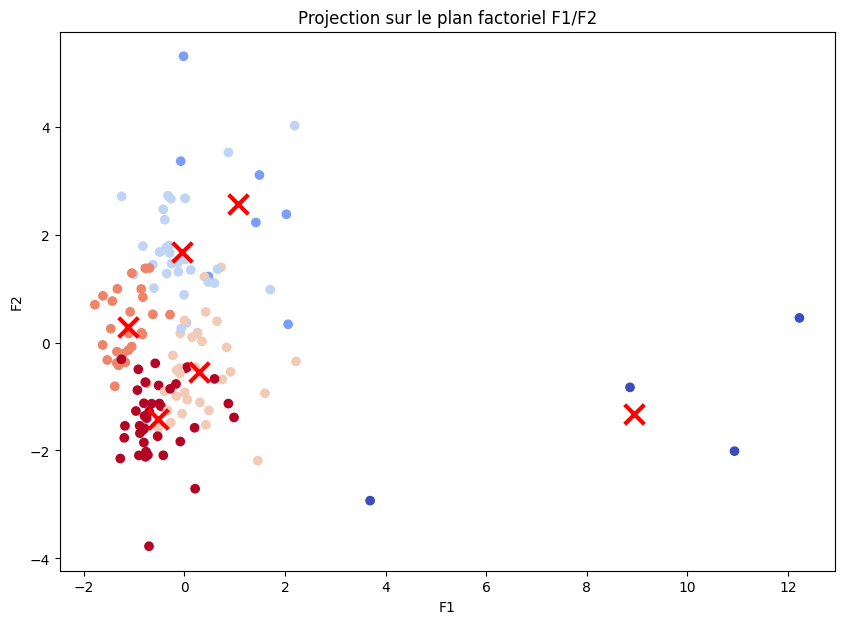

In [28]:
projection_acp_clustering(scores_acp,2, clusters_cah)


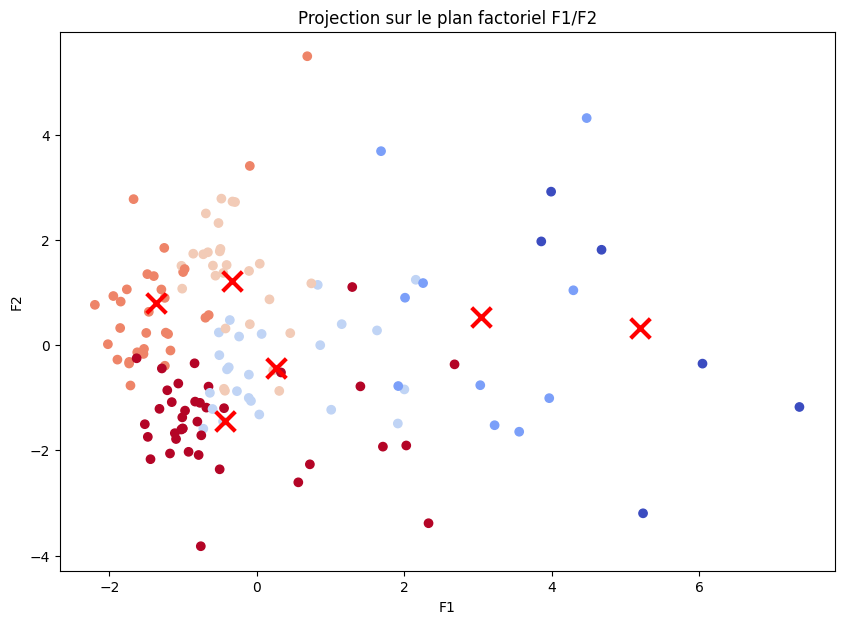

In [29]:
projection_acp_clustering(scores_acp2,2, clusters_cah2)

## Cartes des clusters obtenus par CAH

C:\Users\samir\AppData\Local\Temp\ipykernel_19968\4035277046.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


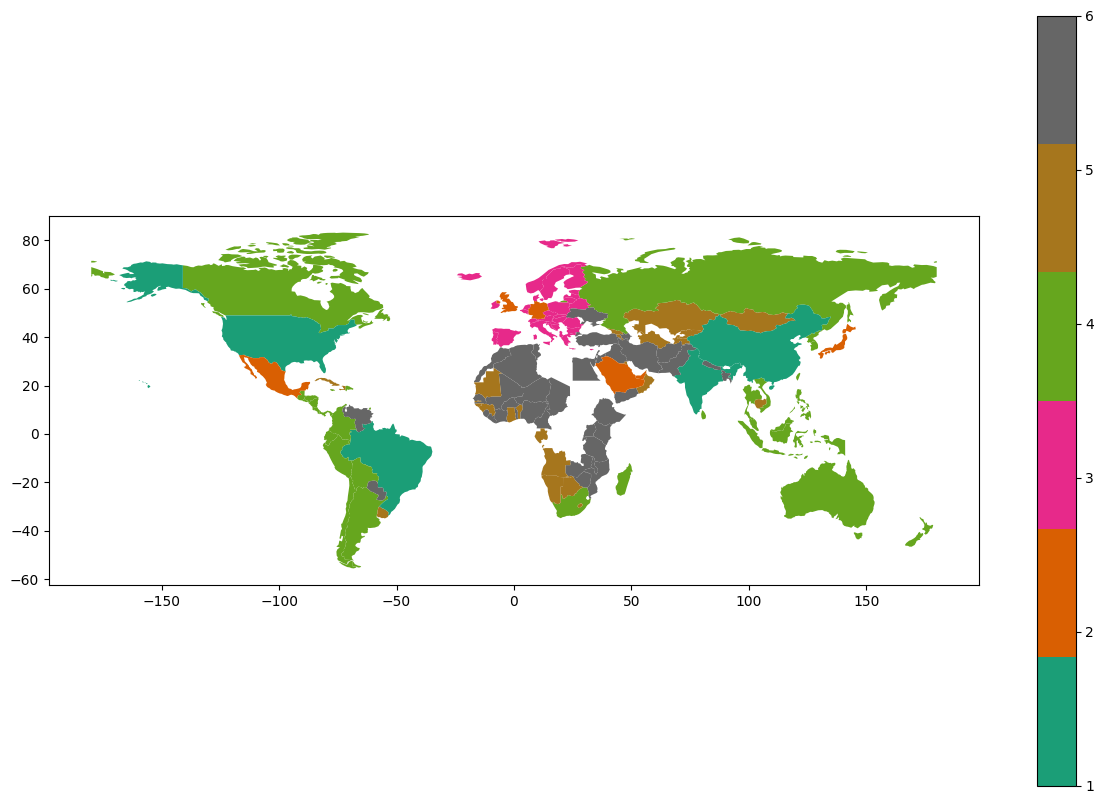

In [30]:

# Charger les données des frontières des pays
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusionner les données en utilisant l'index du DataFrame df_complet
df_carte = df_complet.join(df_final[['pays_en', 'iso_a3']])


# Fusionner les frontières des pays et les données sur les clusters
merged_df = world.set_index('iso_a3').join(df_carte.set_index('iso_a3'), how='inner')

# Remplacer les valeurs NaN par une valeur spécifique (par exemple, -1)
merged_df['clusters_cah'].fillna(-1, inplace=True)

# Créer une carte choropleth avec une légende discrète
n_clusters = len(merged_df['clusters_cah'].unique())
cmap = discrete_cmap(n_clusters)
merged_df.plot(column='clusters_cah', legend=True, figsize=(15, 10), cmap=cmap)
plt.show()


In [63]:
clusters_choisis = [2,3 ]
df_cah_complet = filtre_clusters(df_complet, 'clusters_cah', clusters_choisis)
df_cah_complet

pays  clusters_cah
0                                             Albanie             3
1                                           Allemagne             2
2                                     Arabie saoudite             2
3                                            Autriche             3
4                                             Bélarus             3
5                                            Belgique             3
6                                  Bosnie-Herzégovine             3
7                                            Bulgarie             3
8                            Chine - RAS de Hong-Kong             2
9                                              Chypre             3
10                                            Croatie             3
11                                           Danemark             3
12                                Émirats arabes unis             2
13                                            Espagne             3
14                                            Estonie             3
15                                           Finlande             3
16                                              Grèce             3
17                                            Hongrie             3
18                                            Irlande             3
19                                            Islande             3
20                                             Italie             3
21                                              Japon             2
22                                           Lettonie             3
23                                           Lituanie             3
24                                         Luxembourg             3
25                                              Malte             3
26                                            Mexique             2
27                                            Norvège             3
28                                           Pays-Bas             3
29                                            Pologne             3
30                                           Portugal             3
31                                           Roumanie             3
32  Royaume-Uni de Grande-Bretagne et d'Irlande du...             2
33                                          Slovaquie             3
34                                           Slovénie             3
35                                              Suède             3
36                                             Suisse             3
37                                           Tchéquie             3

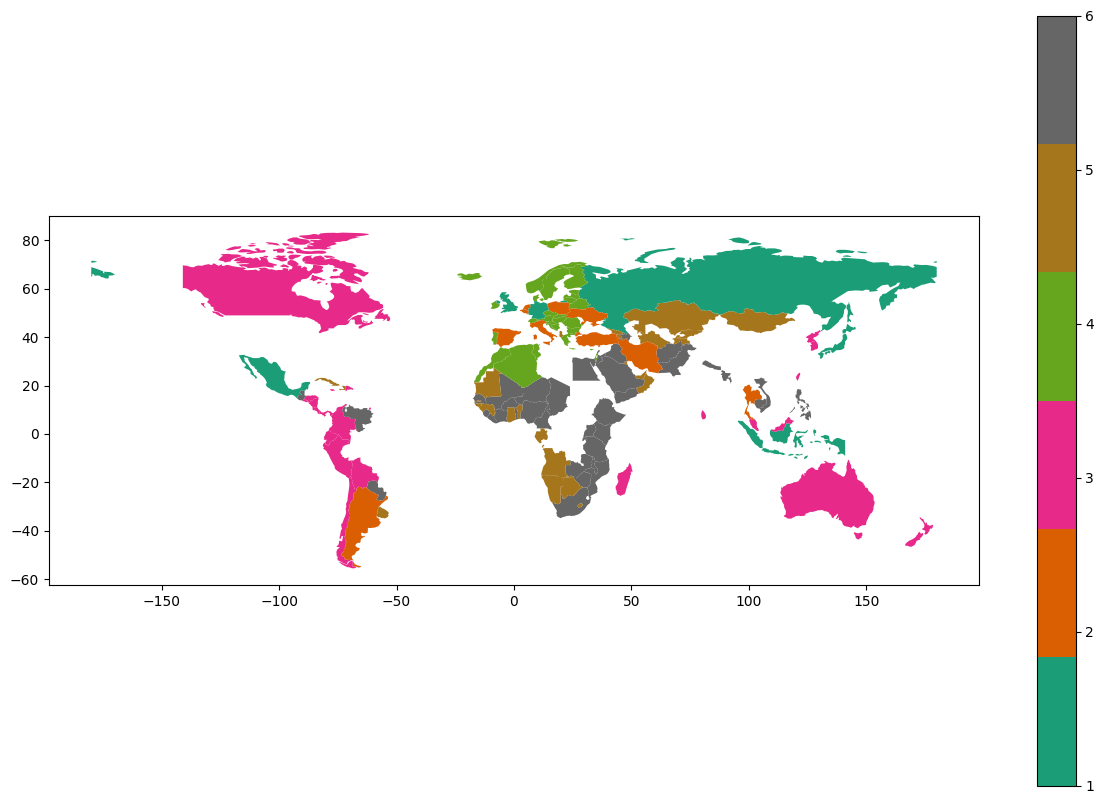

In [31]:

# Fusionner les données en utilisant l'index du DataFrame df_complet
df_carte2 = df_sans.join(df_final[['pays_en', 'iso_a3']])


# Fusionner les frontières des pays et les données sur les clusters
merged_df2 = world.set_index('iso_a3').join(df_carte2.set_index('iso_a3'), how='inner')

# Remplacer les valeurs NaN par une valeur spécifique (par exemple, -1)
merged_df2['clusters_cah2'].fillna(-1, inplace=True)

# Créer une carte choropleth avec une légende discrète
n_clusters = len(merged_df2['clusters_cah2'].unique())
cmap = discrete_cmap(n_clusters)
merged_df2.plot(column='clusters_cah2', legend=True, figsize=(15, 10), cmap=cmap)
plt.show()

In [64]:
clusters_choisis = [3,4, ]
df_cah_sans = filtre_clusters(df_sans, 'clusters_cah2', clusters_choisis)
df_cah_sans

pays  clusters_cah2
0                                      Algérie              4
1                                    Australie              3
2                                     Autriche              4
3                                      Barbade              3
4                                      Bélarus              4
5              Bolivie (État plurinational de)              3
6                           Bosnie-Herzégovine              4
7                                     Bulgarie              4
8                                       Canada              3
9                                        Chili              3
10                   Chine, Taiwan Province de              3
11                                      Chypre              4
12                                    Colombie              3
13                                  Costa Rica              3
14                                     Croatie              4
15                                    Danemark              4
16                                 El Salvador              3
17                                    Équateur              3
18                                     Estonie              4
19                                    Finlande              4
20                                       Grèce              4
21                                    Honduras              3
22                                     Hongrie              4
23                                     Irlande              4
24                                     Islande              4
25                                      Israël              4
26                                    Jamaïque              3
27                                    Lettonie              4
28                                    Lituanie              4
29                                  Madagascar              3
30                                    Malaisie              3
31                                       Maroc              4
32                                     Maurice              3
33                                   Nicaragua              3
34                                     Norvège              4
35                            Nouvelle-Zélande              3
36                                      Panama              3
37                                       Pérou              3
38                                    Portugal              4
39                         République de Corée              3
40                      République dominicaine              3
41  République populaire démocratique de Corée              3
42                                    Roumanie              4
43                                   Slovaquie              4
44                                    Slovénie              4
45                                   Sri Lanka              3
46                                       Suède              4
47                                      Suisse              4
48                                    Tchéquie              4
49                           Trinité-et-Tobago              3
50                                     Tunisie              4

******

# K-means

## Choix du nombre de clusters

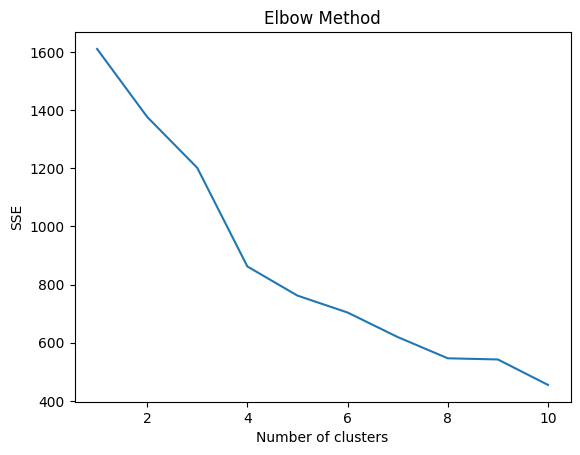

In [39]:
# Méthode du coude
sse = []  # Initialisation de la liste pour stocker les valeurs de SSE (somme des carrés des erreurs)
for k in range(1, 11):  # Boucle sur les nombres de clusters de 1 à 10
    # Initialisation de l'algorithme KMeans avec k clusters, initialisation "k-means++" et n_init défini sur 'auto'
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init='auto')  
    kmeans.fit(scores_acp)  # Ajustement de l'algorithme KMeans sur les données
    sse.append(kmeans.inertia_)  # Ajout de la valeur de SSE (inertie) pour k clusters à la liste

# Création du graphique de la méthode du coude
plt.plot(range(1, 11), sse)  # Tracé de SSE en fonction du nombre de clusters
plt.title('Méthode du coude')  # Titre du graphique
plt.xlabel('Nombre de clusters')  # Label de l'axe des x
plt.ylabel('SSE')  # Label de l'axe des y
plt.show()  # Affichage du graphique


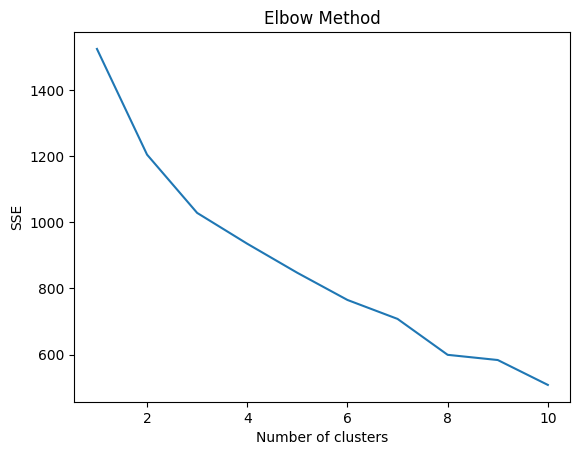

In [40]:
# Méthode du coude
sse = []  # Initialisation de la liste pour stocker les valeurs de SSE (somme des carrés des erreurs)
for k in range(1, 11):  # Boucle sur les nombres de clusters de 1 à 10
    # Initialisation de l'algorithme KMeans avec k clusters, initialisation "k-means++" et n_init défini sur 'auto'
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init='auto')  
    kmeans.fit(scores_acp2)  # Ajustement de l'algorithme KMeans sur les données
    sse.append(kmeans.inertia_)  # Ajout de la valeur de SSE (inertie) pour k clusters à la liste

# Création du graphique de la méthode du coude
plt.plot(range(1, 11), sse)  # Tracé de SSE en fonction du nombre de clusters
plt.title('Méthode du coude')  # Titre du graphique
plt.xlabel('Nombre de clusters')  # Label de l'axe des x
plt.ylabel('SSE')  # Label de l'axe des y
plt.show()  # Affichage du graphique


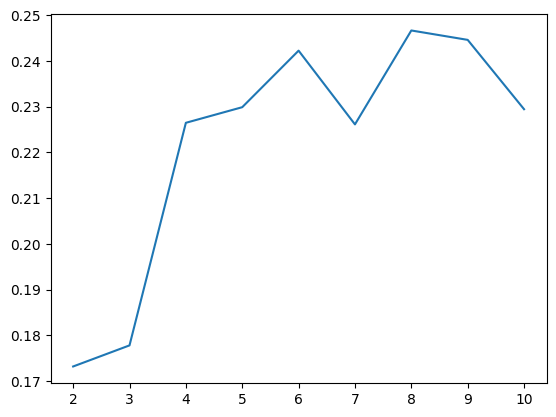

In [41]:
silhouettes = []  # Initialisation de la liste pour stocker les scores de silhouette
for num_clusters in range(2, 11):  # Boucle sur les nombres de clusters de 2 à 10
    # Initialisation de l'algorithme KMeans avec num_clusters clusters, initialisation "k-means++" et n_init défini sur 'auto'
    cls = KMeans(n_clusters=num_clusters, n_init="auto", init="k-means++")  
    cls.fit(scores_acp)  # Ajustement de l'algorithme KMeans sur les données
    # Calcul du score de silhouette pour num_clusters clusters
    silh = silhouette_score(scores_acp, cls.labels_)  
    silhouettes.append(silh)  # Ajout du score de silhouette à la liste

# Création du graphique des scores de silhouette
plt.plot(range(2, 11), silhouettes)  # Tracé des scores de silhouette en fonction du nombre de clusters
plt.xlabel('Nombre de clusters')  # Label de l'axe des x
plt.ylabel('Score de silhouette')  # Label de l'axe des y
plt.show()  # Affichage du graphique


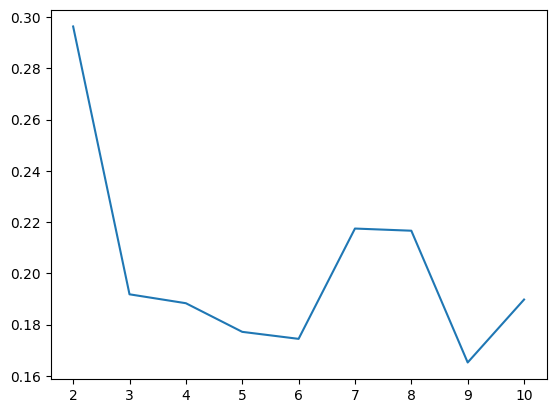

In [42]:
silhouettes = []  # Initialisation de la liste pour stocker les scores de silhouette
for num_clusters in range(2, 11):  # Boucle sur les nombres de clusters de 2 à 10
    # Initialisation de l'algorithme KMeans avec num_clusters clusters, initialisation "k-means++" et n_init défini sur 'auto'
    cls = KMeans(n_clusters=num_clusters, n_init="auto", init="k-means++")  
    cls.fit(scores_acp2)  # Ajustement de l'algorithme KMeans sur les données
    # Calcul du score de silhouette pour num_clusters clusters
    silh = silhouette_score(scores_acp2, cls.labels_)  
    silhouettes.append(silh)  # Ajout du score de silhouette à la liste

# Création du graphique des scores de silhouette
plt.plot(range(2, 11), silhouettes)  # Tracé des scores de silhouette en fonction du nombre de clusters
plt.xlabel('Nombre de clusters')  # Label de l'axe des x
plt.ylabel('Score de silhouette')  # Label de l'axe des y
plt.show()  # Affichage du graphique

    
plt.plot(range(2, 11), silhouettes)

In [43]:
# Nombre de clusters souhaités
n_clust = 6


# Clustering par K-means
model_km = KMeans(n_clusters=n_clust, n_init = 10, init='k-means++')
model_km.fit(scores_acp)

# Récupération des clusters attribués à chaque individu
clusters_km = model_km.labels_

# Ajout des clusters dans le dataframe
df_complet['clusters_km'] = clusters_km

In [44]:
# Nombre de clusters souhaités
n_clust = 5


# Clustering par K-means
model_km2 = KMeans(n_clusters=n_clust, n_init = 10, init='k-means++')
model_km2.fit(scores_acp2)

# Récupération des clusters attribués à chaque individu
clusters_km2 = model_km2.labels_

df_sans['clusters_km2'] = clusters_km2


In [45]:
df_complet['clusters_km'].value_counts()

clusters_km
0    36
3    35
1    30
5    28
2     8
4     3
Name: count, dtype: int64

In [46]:
df_sans['clusters_km2'].value_counts()

clusters_km2
4    33
0    31
2    30
3    24
1    18
Name: count, dtype: int64

## Analyse des clusters

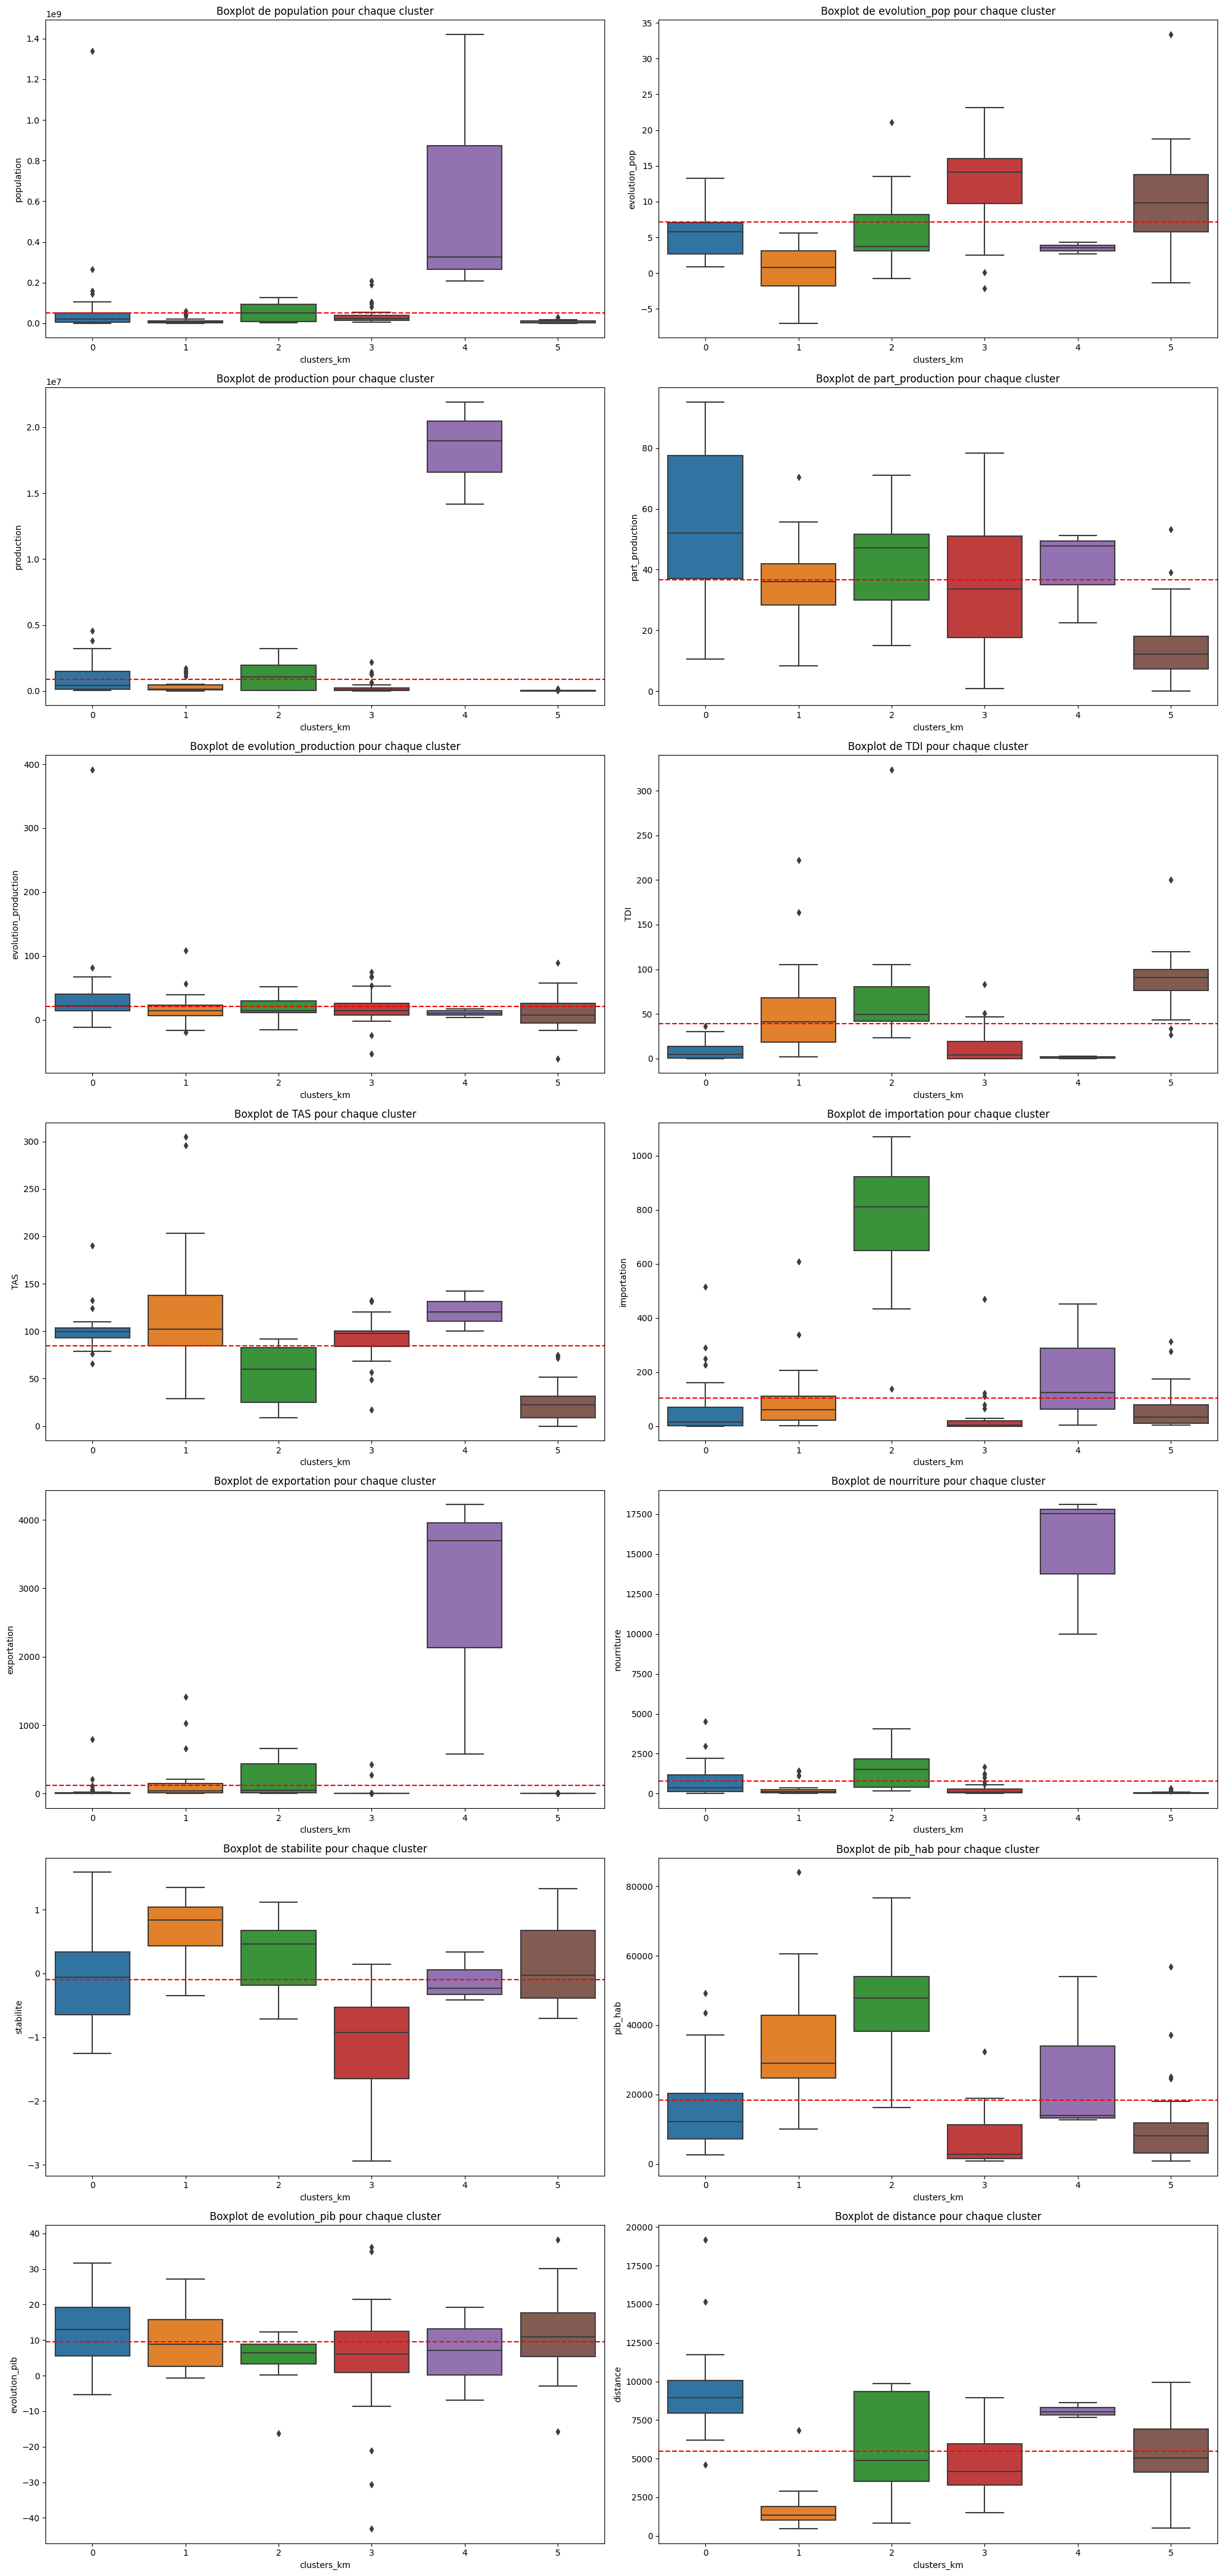

In [47]:
generation_boxplots(df_complet, 'clusters_km')

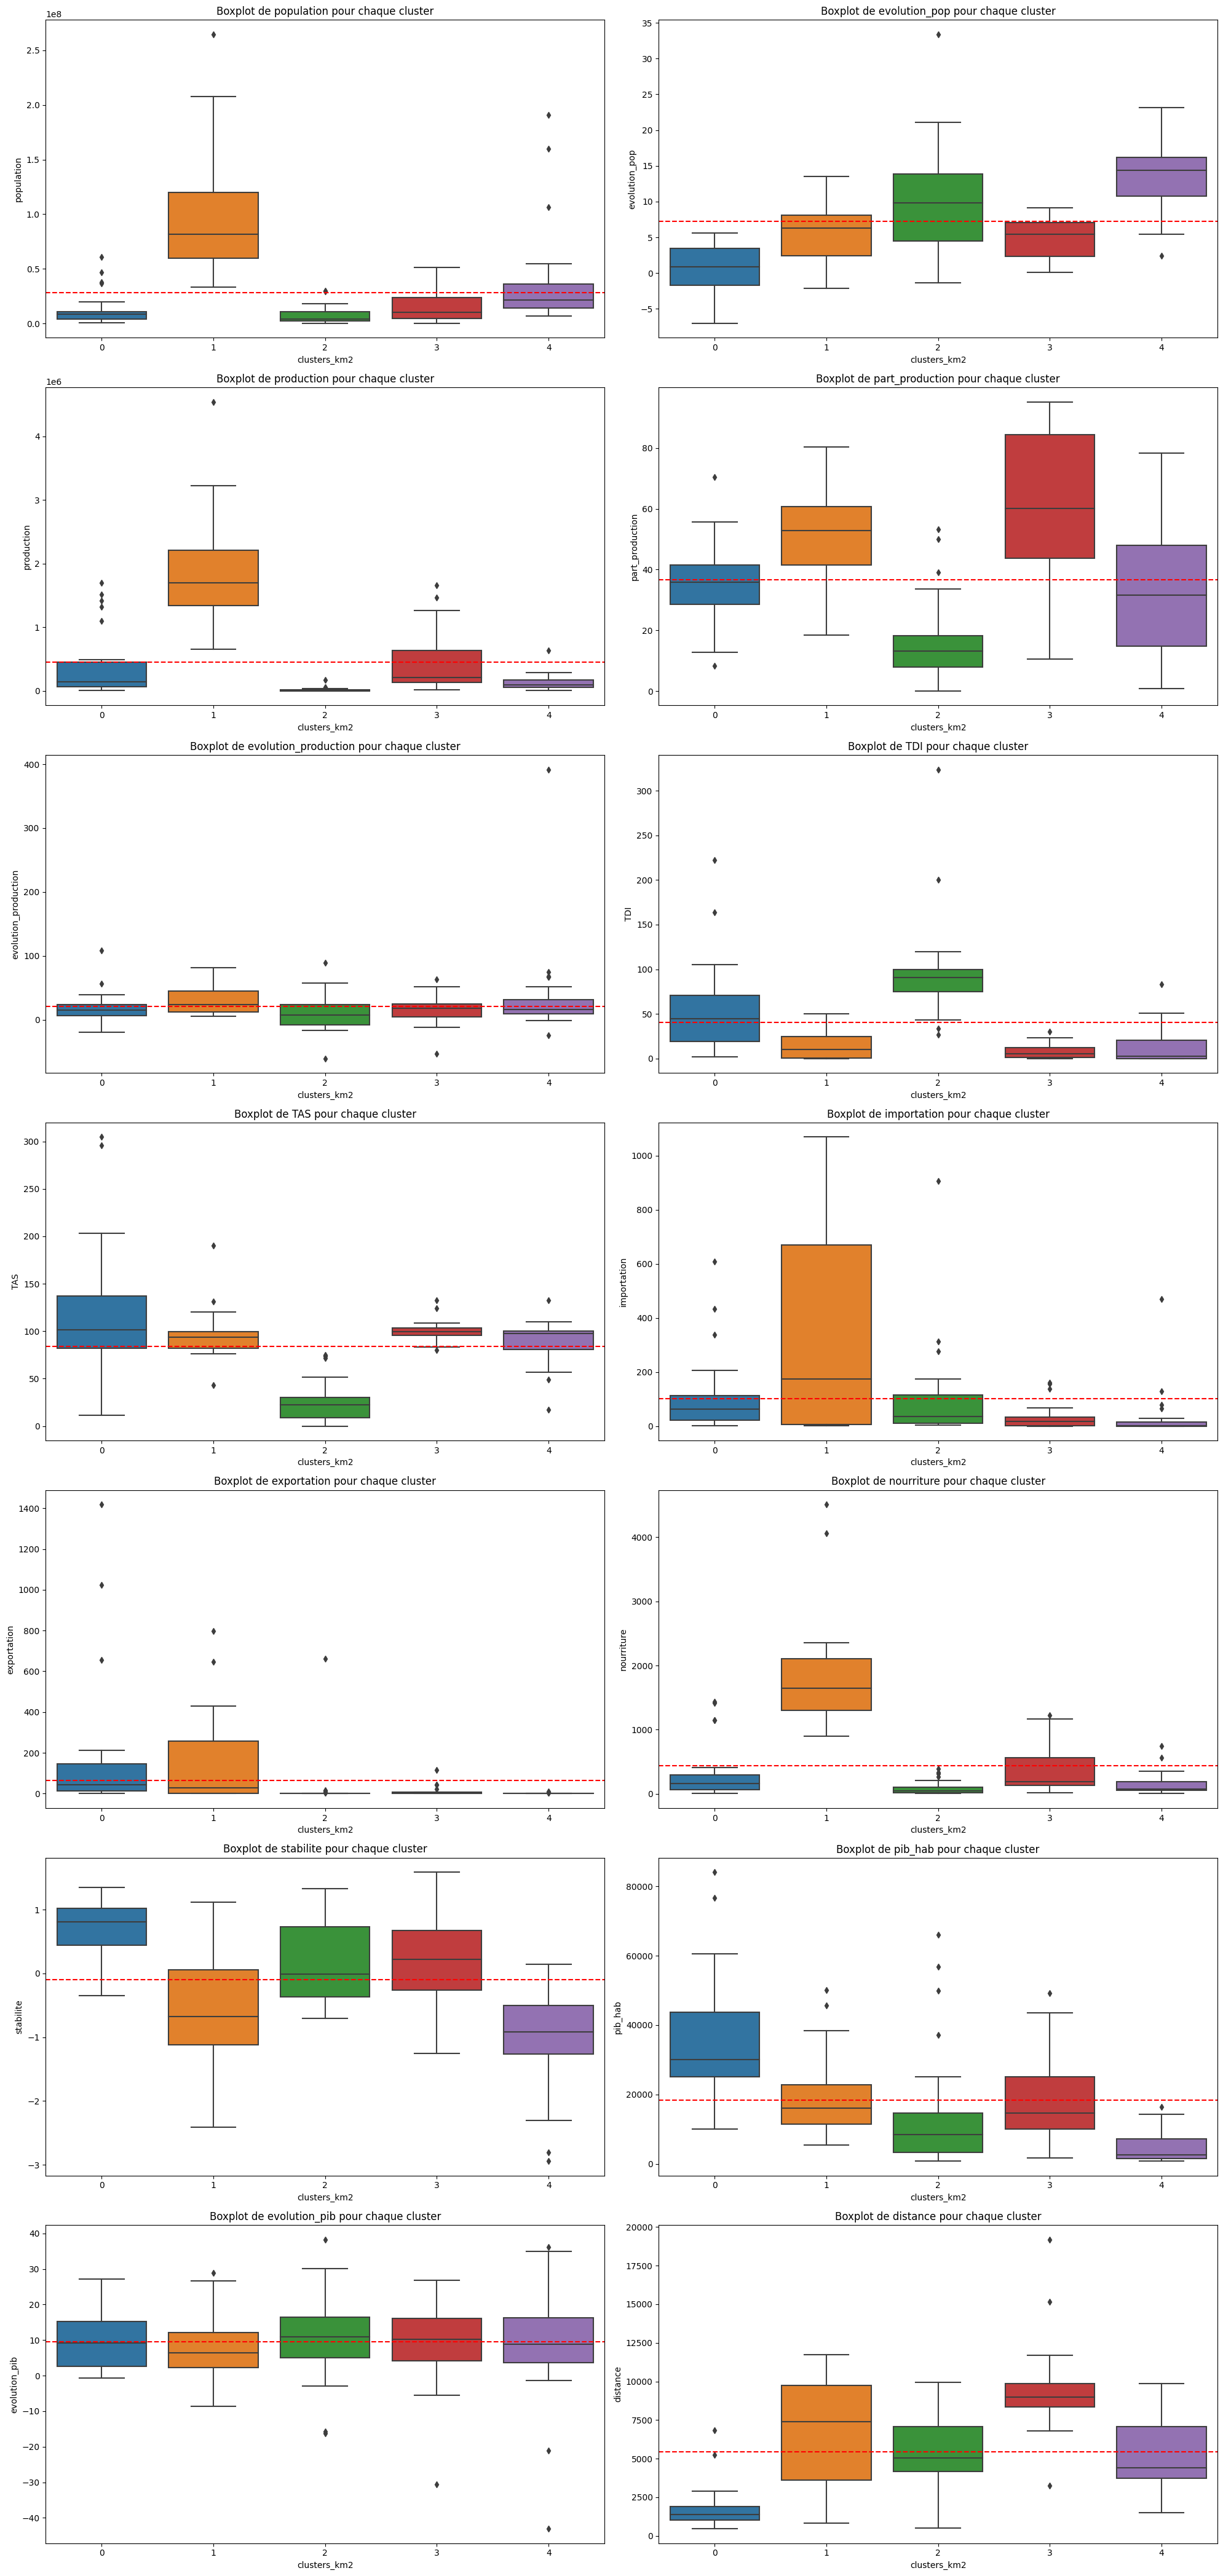

In [48]:
generation_boxplots(df_sans, 'clusters_km2')

c:\Users\samir\Desktop\[OPENCLASSROOMS]\009 Produisez une étude de marché avec R ou Python\[LIVRABLES]\functions.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  col for col in df.columns if "cluster" not in col or col == cluster_col


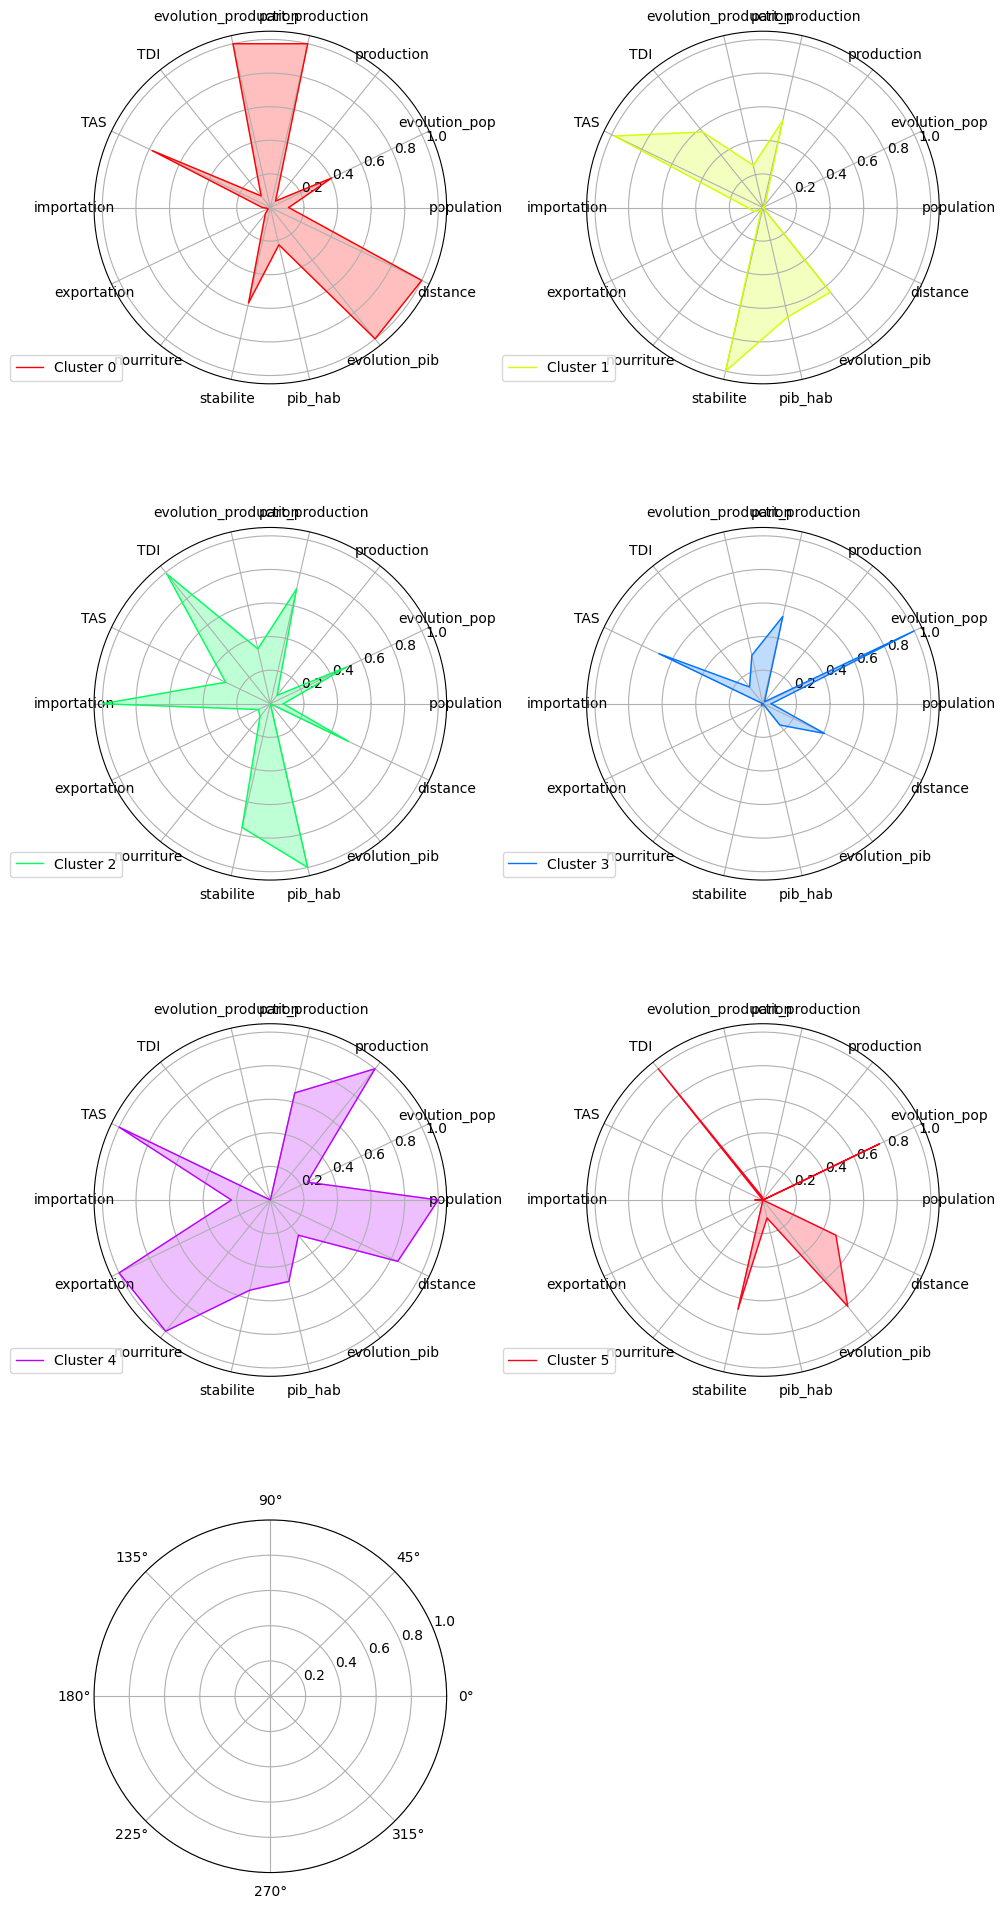

In [49]:
radar_clustering(df_complet, clusters_km)

c:\Users\samir\Desktop\[OPENCLASSROOMS]\009 Produisez une étude de marché avec R ou Python\[LIVRABLES]\functions.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  col for col in df.columns if "cluster" not in col or col == cluster_col


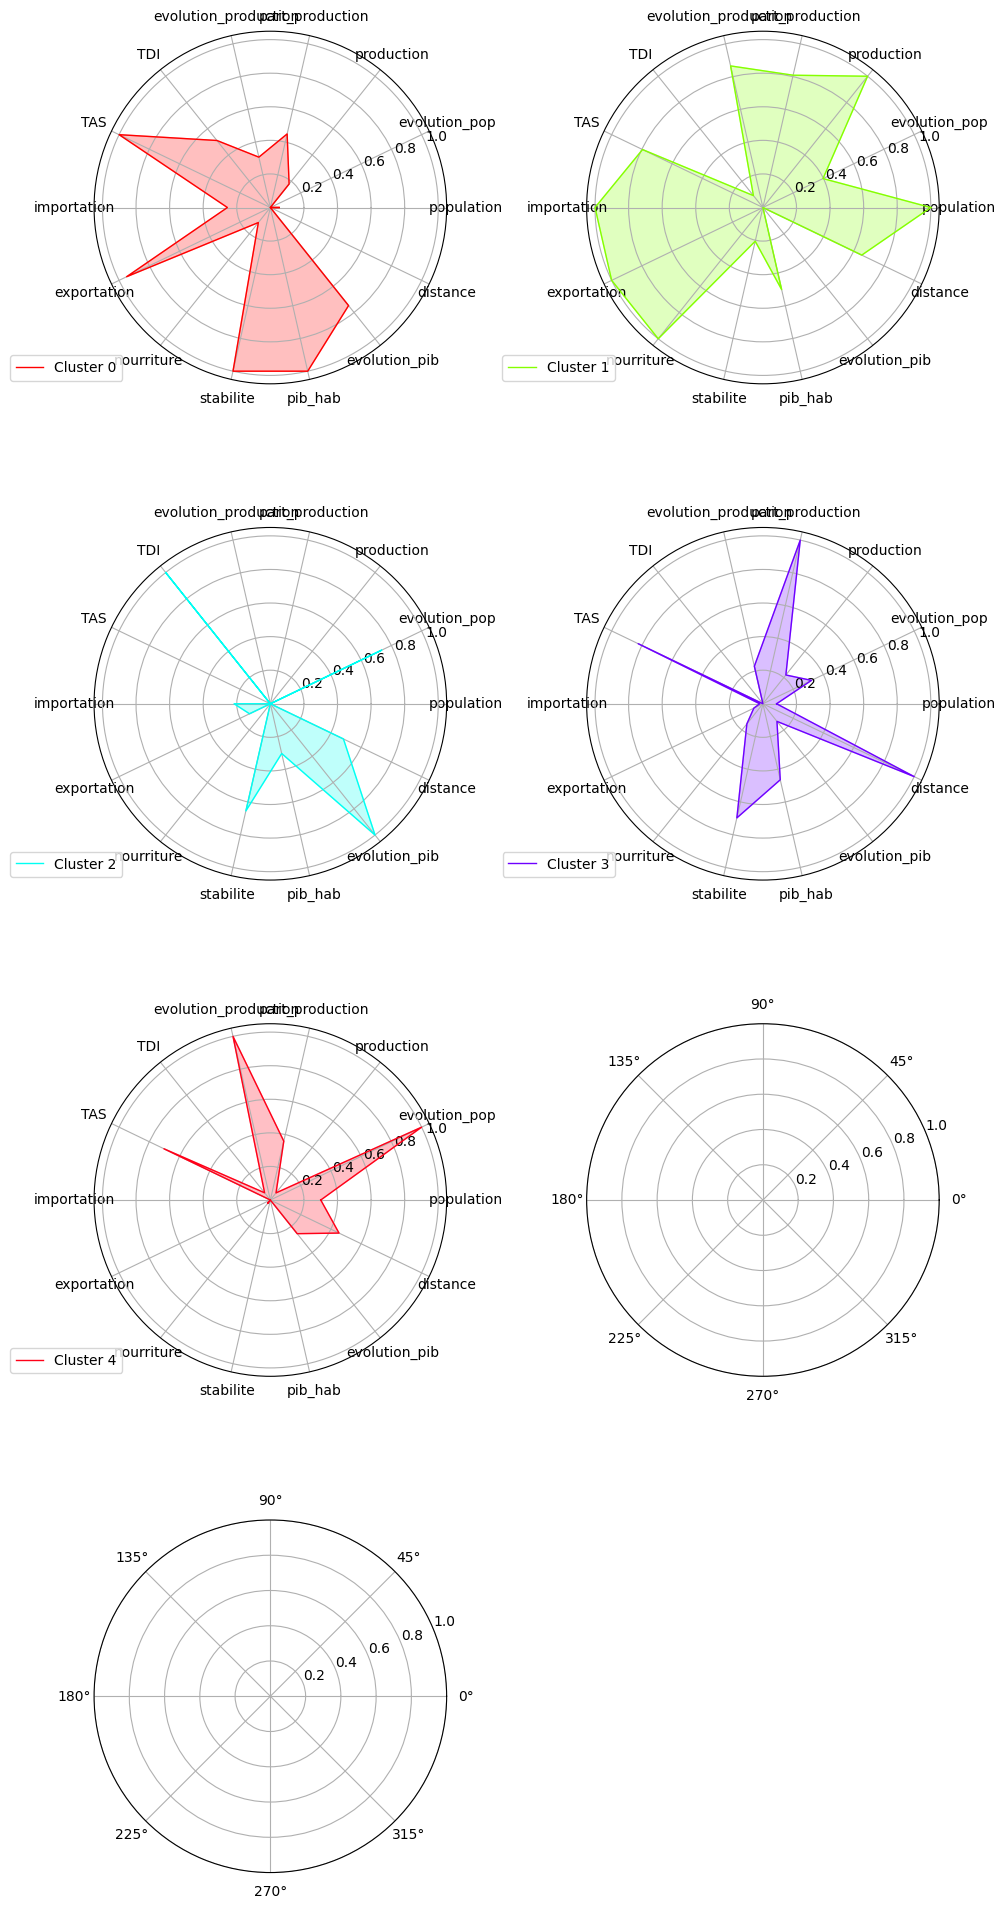

In [50]:
radar_clustering(df_sans, clusters_km2)

## Projection des clusters issus du K-means sur le premier plan factoriel.

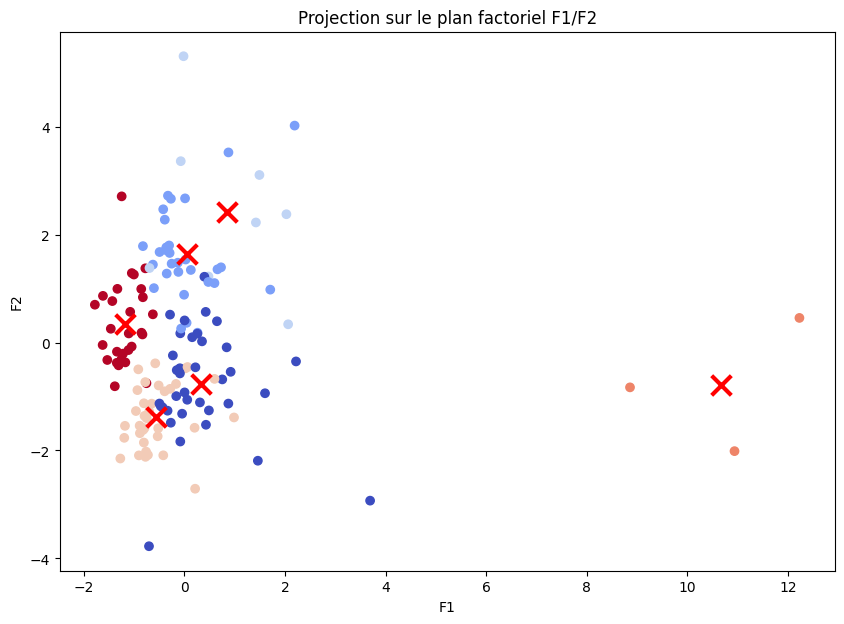

In [51]:
projection_acp_clustering(scores_acp,2, clusters_km)

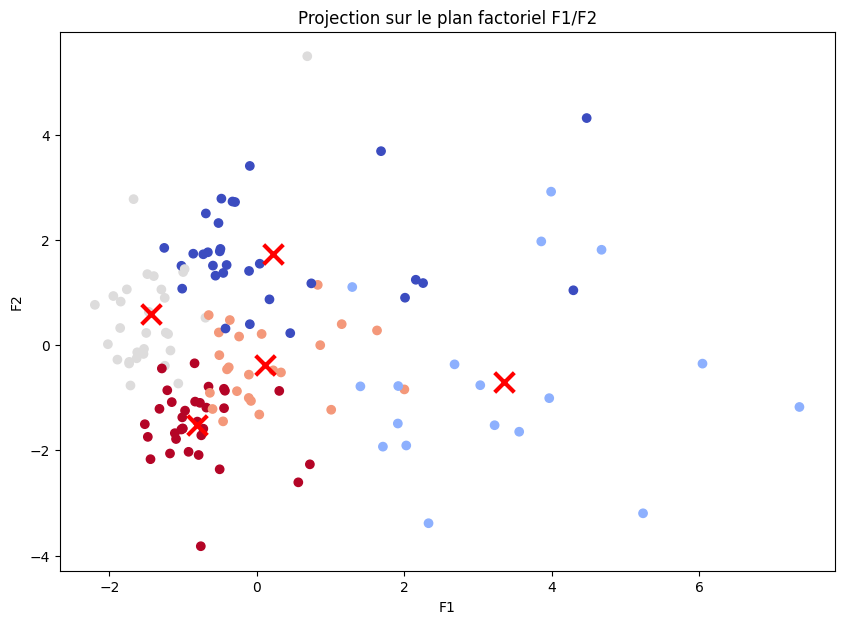

In [52]:
projection_acp_clustering(scores_acp2, 2, clusters_km2)

## Cartes des clusters obtenus par K-means

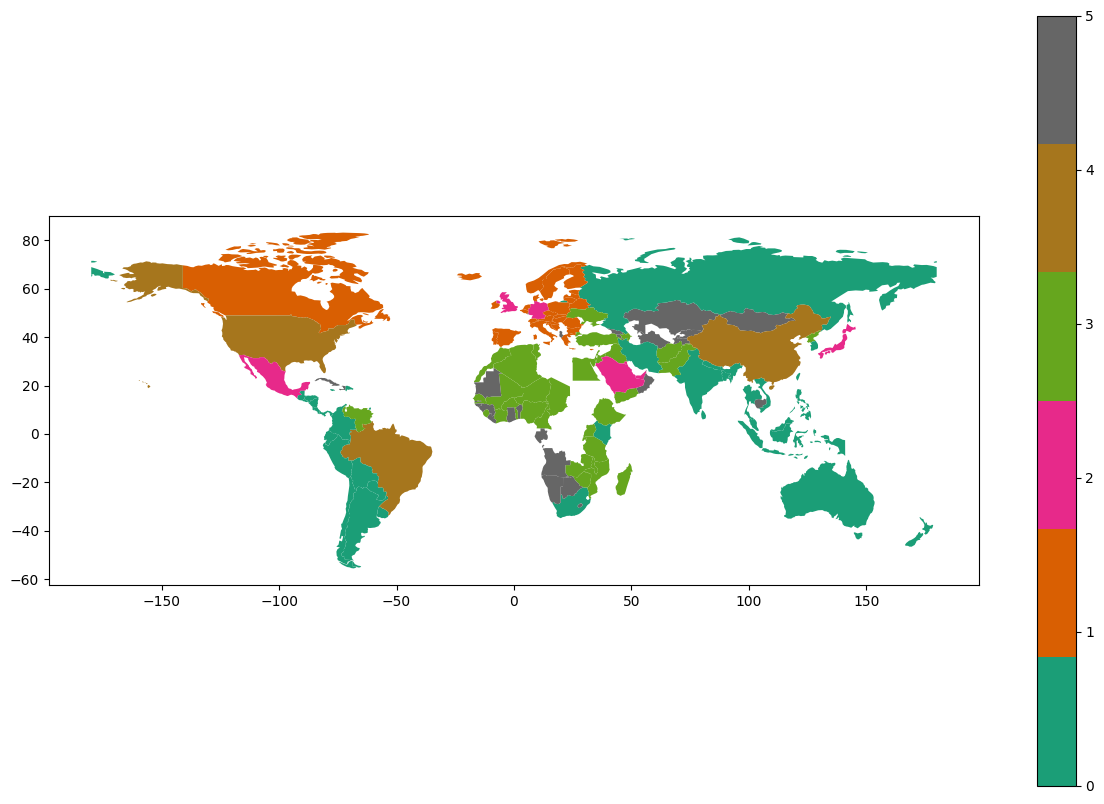

In [53]:

# Fusionner les données en utilisant l'index du DataFrame df_complet
df_carte = df_complet.join(df_final[['pays_en', 'iso_a3']])


# Fusionner les frontières des pays et les données sur les clusters
merged_df = world.set_index('iso_a3').join(df_carte.set_index('iso_a3'), how='inner')

# Remplacer les valeurs NaN par une valeur spécifique (par exemple, -1)
merged_df['clusters_km'].fillna(-1, inplace=True)


# Créer une carte choropleth avec une légende discrète
n_clusters = len(merged_df['clusters_km'].unique())
cmap = discrete_cmap(n_clusters)
merged_df.plot(column='clusters_km', legend=True, figsize=(15, 10), cmap=cmap)
plt.show()



In [65]:
clusters_choisis = [1,2 ]
df_km_complet = filtre_clusters(df_complet, 'clusters_km', clusters_choisis)
df_km_complet

pays  clusters_km
0                                           Allemagne            2
1                                     Arabie saoudite            2
2                                            Autriche            1
3                                             Bélarus            1
4                                            Belgique            1
5                                  Bosnie-Herzégovine            1
6                                            Bulgarie            1
7                                              Canada            1
8                            Chine - RAS de Hong-Kong            2
9                                              Chypre            1
10                                            Croatie            1
11                                           Danemark            1
12                                Émirats arabes unis            2
13                                            Espagne            1
14                                            Estonie            1
15                                           Finlande            1
16                                              Grèce            1
17                                            Hongrie            1
18                                            Irlande            1
19                                            Islande            1
20                                             Italie            1
21                                              Japon            2
22                                             Koweït            2
23                                           Lettonie            1
24                                           Lituanie            1
25                                              Malte            1
26                                            Mexique            2
27                                            Norvège            1
28                                           Pays-Bas            1
29                                            Pologne            1
30                                           Portugal            1
31                                           Roumanie            1
32  Royaume-Uni de Grande-Bretagne et d'Irlande du...            2
33                                          Slovaquie            1
34                                           Slovénie            1
35                                              Suède            1
36                                             Suisse            1
37                                           Tchéquie            1

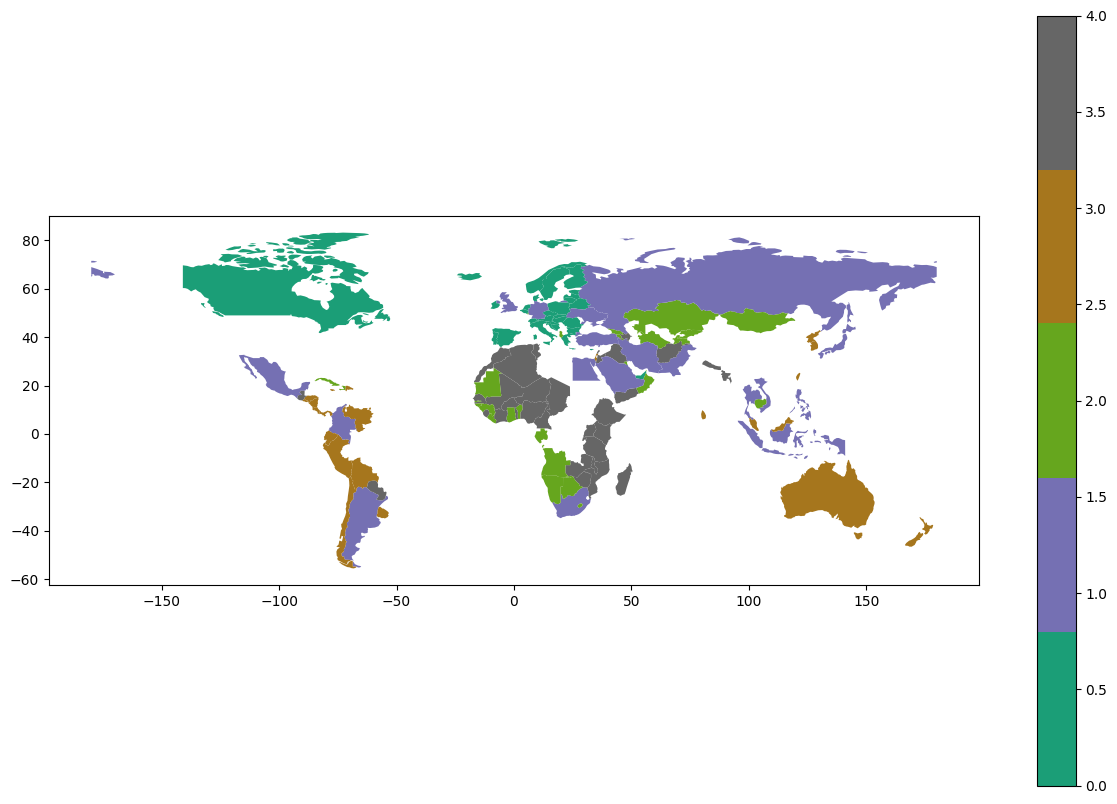

In [55]:


# Fusionner les données en utilisant l'index du DataFrame df_complet
df_carte2 = df_sans.join(df_final[['pays_en', 'iso_a3']])

# Fusionner les frontières des pays et les données sur les clusters
merged_df2 = world.set_index('iso_a3').join(df_carte2.set_index('iso_a3'), how='inner')

# Remplacer les valeurs NaN par une valeur spécifique (par exemple, -1)
merged_df2['clusters_km2'].fillna(-1, inplace=True)

# Créer une carte choropleth avec une légende discrète
n_clusters = len(merged_df2['clusters_km2'].unique())
cmap = discrete_cmap(n_clusters)
merged_df2.plot(column='clusters_km2', legend=True, figsize=(15, 10), cmap=cmap)
plt.show()


In [66]:
clusters_choisis = [0,1 ]
df_km_sans = filtre_clusters(df_sans, 'clusters_km2', clusters_choisis)
df_km_sans

pays  clusters_km2
0                                      Afrique du Sud             1
1                                           Allemagne             1
2                                     Arabie saoudite             1
3                                           Argentine             1
4                                            Autriche             0
5                                             Bélarus             0
6                                            Belgique             0
7                                  Bosnie-Herzégovine             0
8                                            Bulgarie             0
9                                              Canada             0
10                                             Chypre             0
11                                           Colombie             1
12                                            Croatie             0
13                                           Danemark             0
14                                             Égypte             1
15                                Émirats arabes unis             0
16                                            Espagne             0
17                                            Estonie             0
18                               Fédération de Russie             1
19                                           Finlande             0
20                                              Grèce             0
21                                            Hongrie             0
22                                          Indonésie             1
23                     Iran (République islamique d')             1
24                                            Irlande             0
25                                            Islande             0
26                                             Italie             0
27                                              Japon             1
28                                           Lettonie             0
29                                           Lituanie             0
30                                              Malte             0
31                                            Mexique             1
32                                            Norvège             0
33                                           Pakistan             1
34                                           Pays-Bas             0
35                                        Philippines             1
36                                            Pologne             0
37                                           Portugal             0
38                                           Roumanie             0
39  Royaume-Uni de Grande-Bretagne et d'Irlande du...             1
40                                          Slovaquie             0
41                                           Slovénie             0
42                                              Suède             0
43                                             Suisse             0
44                                           Tchéquie             0
45                                          Thaïlande             1
46                                            Turquie             1
47                                            Ukraine             1
48                                           Viet Nam             1

In [67]:
df_inter_complet = pd.merge(df_cah_complet, df_km_complet, on='pays')
df_inter_complet

pays  clusters_cah  \
0                                           Allemagne             2   
1                                     Arabie saoudite             2   
2                                            Autriche             3   
3                                             Bélarus             3   
4                                            Belgique             3   
5                                  Bosnie-Herzégovine             3   
6                                            Bulgarie             3   
7                            Chine - RAS de Hong-Kong             2   
8                                              Chypre             3   
9                                             Croatie             3   
10                                           Danemark             3   
11                                Émirats arabes unis             2   
12                                            Espagne             3   
13                                            Estonie             3   
14                                           Finlande             3   
15                                              Grèce             3   
16                                            Hongrie             3   
17                                            Irlande             3   
18                                            Islande             3   
19                                             Italie             3   
20                                              Japon             2   
21                                           Lettonie             3   
22                                           Lituanie             3   
23                                              Malte             3   
24                                            Mexique             2   
25                                            Norvège             3   
26                                           Pays-Bas             3   
27                                            Pologne             3   
28                                           Portugal             3   
29                                           Roumanie             3   
30  Royaume-Uni de Grande-Bretagne et d'Irlande du...             2   
31                                          Slovaquie             3   
32                                           Slovénie             3   
33                                              Suède             3   
34                                             Suisse             3   
35                                           Tchéquie             3   

    clusters_km  
0             2  
1             2  
2             1  
3             1  
4             1  
5             1  
6             1  
7             2  
8             1  
9             1  
10            1  
11            2  
12            1  
13            1  
14            1  
15            1  
16            1  
17            1  
18            1  
19            1  
20            2  
21            1  
22            1  
23            1  
24            2  
25            1  
26            1  
27            1  
28            1  
29            1  
30            2  
31            1  
32            1  
33            1  
34            1  
35            1

In [68]:
df_inter_sans = pd.merge(df_cah_sans, df_km_sans, on='pays')
df_inter_sans

pays  clusters_cah2  clusters_km2
0             Autriche              4             0
1              Bélarus              4             0
2   Bosnie-Herzégovine              4             0
3             Bulgarie              4             0
4               Canada              3             0
5               Chypre              4             0
6             Colombie              3             1
7              Croatie              4             0
8             Danemark              4             0
9              Estonie              4             0
10            Finlande              4             0
11               Grèce              4             0
12             Hongrie              4             0
13             Irlande              4             0
14             Islande              4             0
15            Lettonie              4             0
16            Lituanie              4             0
17             Norvège              4             0
18            Portugal              4             0
19            Roumanie              4             0
20           Slovaquie              4             0
21            Slovénie              4             0
22               Suède              4             0
23              Suisse              4             0
24            Tchéquie              4             0

In [69]:
df_cah_select = pd.merge(df_cah_complet, df_cah_sans, on='pays')
df_cah_select

pays  clusters_cah  clusters_cah2
0             Autriche             3              4
1              Bélarus             3              4
2   Bosnie-Herzégovine             3              4
3             Bulgarie             3              4
4               Chypre             3              4
5              Croatie             3              4
6             Danemark             3              4
7              Estonie             3              4
8             Finlande             3              4
9                Grèce             3              4
10             Hongrie             3              4
11             Irlande             3              4
12             Islande             3              4
13            Lettonie             3              4
14            Lituanie             3              4
15             Norvège             3              4
16            Portugal             3              4
17            Roumanie             3              4
18           Slovaquie             3              4
19            Slovénie             3              4
20               Suède             3              4
21              Suisse             3              4
22            Tchéquie             3              4

In [70]:
df_kmeans_select = pd.merge(df_km_complet, df_km_sans, on='pays')
df_kmeans_select

pays  clusters_km  \
0                                           Allemagne            2   
1                                     Arabie saoudite            2   
2                                            Autriche            1   
3                                             Bélarus            1   
4                                            Belgique            1   
5                                  Bosnie-Herzégovine            1   
6                                            Bulgarie            1   
7                                              Canada            1   
8                                              Chypre            1   
9                                             Croatie            1   
10                                           Danemark            1   
11                                Émirats arabes unis            2   
12                                            Espagne            1   
13                                            Estonie            1   
14                                           Finlande            1   
15                                              Grèce            1   
16                                            Hongrie            1   
17                                            Irlande            1   
18                                            Islande            1   
19                                             Italie            1   
20                                              Japon            2   
21                                           Lettonie            1   
22                                           Lituanie            1   
23                                              Malte            1   
24                                            Mexique            2   
25                                            Norvège            1   
26                                           Pays-Bas            1   
27                                            Pologne            1   
28                                           Portugal            1   
29                                           Roumanie            1   
30  Royaume-Uni de Grande-Bretagne et d'Irlande du...            2   
31                                          Slovaquie            1   
32                                           Slovénie            1   
33                                              Suède            1   
34                                             Suisse            1   
35                                           Tchéquie            1   

    clusters_km2  
0              1  
1              1  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0  
10             0  
11             0  
12             0  
13             0  
14             0  
15             0  
16             0  
17             0  
18             0  
19             0  
20             1  
21             0  
22             0  
23             0  
24             1  
25             0  
26             0  
27             0  
28             0  
29             0  
30             1  
31             0  
32             0  
33             0  
34             0  
35             0

In [124]:
from collections import Counter

# Concaténer les colonnes "pays" de chaque DataFrame en une seule liste
pays_list = df_inter_complet['pays'].tolist() + df_inter_sans['pays'].tolist() + df_cah_select['pays'].tolist() + df_kmeans_select['pays'].tolist()

# Compter les occurrences de chaque pays
occurrences = Counter(pays_list)

# Trier les occurrences par ordre décroissant
occurrences_sorted = sorted(occurrences.items(), key=lambda x: x[1], reverse=True)

# Créer un DataFrame à partir des occurrences des pays
df_occurrences = pd.DataFrame(occurrences_sorted, columns=['Pays', 'Occurrences'])

# Afficher le DataFrame des occurrences
df_occurrences

Pays  Occurrences
0                                            Autriche            4
1                                             Bélarus            4
2                                  Bosnie-Herzégovine            4
3                                            Bulgarie            4
4                                              Chypre            4
5                                             Croatie            4
6                                            Danemark            4
7                                             Estonie            4
8                                            Finlande            4
9                                               Grèce            4
10                                            Hongrie            4
11                                            Irlande            4
12                                            Islande            4
13                                           Lettonie            4
14                                           Lituanie            4
15                                            Norvège            4
16                                           Portugal            4
17                                           Roumanie            4
18                                          Slovaquie            4
19                                           Slovénie            4
20                                              Suède            4
21                                             Suisse            4
22                                           Tchéquie            4
23                                          Allemagne            2
24                                    Arabie saoudite            2
25                                           Belgique            2
26                                Émirats arabes unis            2
27                                            Espagne            2
28                                             Italie            2
29                                              Japon            2
30                                              Malte            2
31                                            Mexique            2
32                                           Pays-Bas            2
33                                            Pologne            2
34  Royaume-Uni de Grande-Bretagne et d'Irlande du...            2
35                                             Canada            2
36                           Chine - RAS de Hong-Kong            1
37                                           Colombie            1

In [125]:
df_choix_pays = df_occurrences[df_occurrences['Occurrences'] == 4]  

In [126]:
df_choix_pays = df_choix_pays.merge(df_complet, left_on='Pays', right_on=df_complet.index)

In [129]:
df_choix_pays.drop(columns=['Occurrences'], inplace=True)  

C:\Users\samir\AppData\Local\Temp\ipykernel_19968\1887254414.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


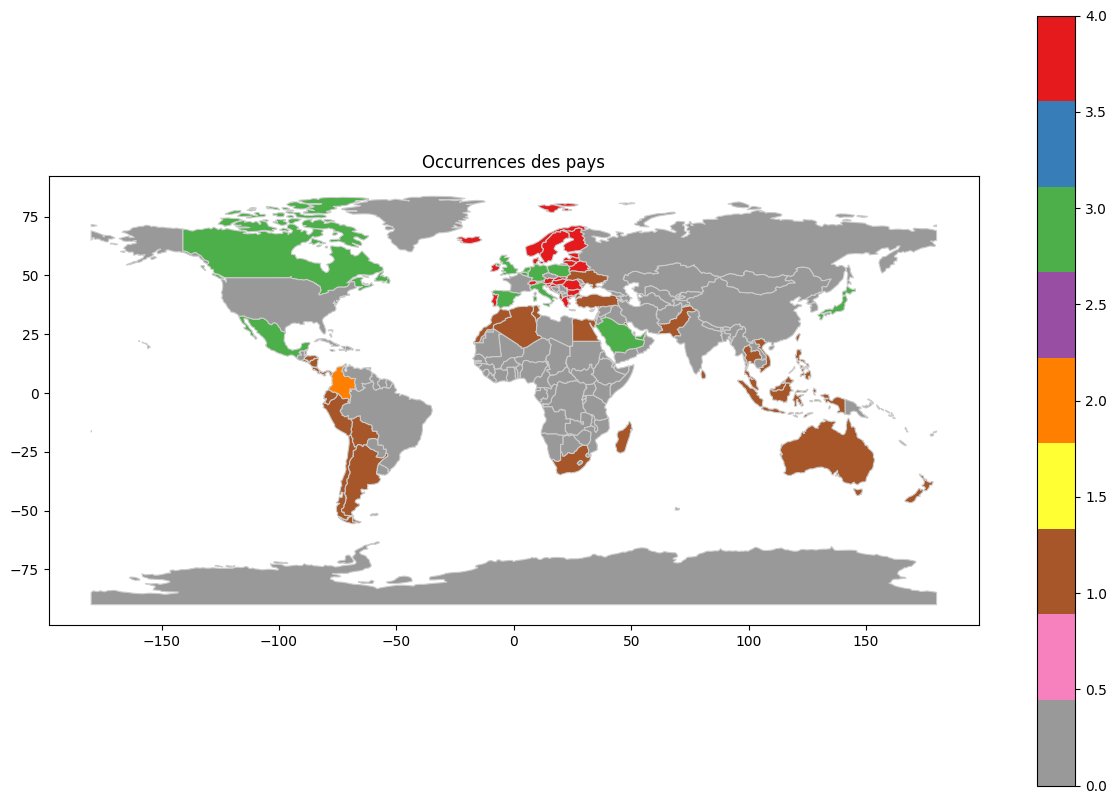

In [108]:
# Réinitialiser l'index des DataFrames
df_final_reset = df_final.reset_index()
df_occurrences_reset = df_occurrences.reset_index()

# Fusionner les données du DataFrame final avec les occurrences des pays
df_final_occurrences = df_final_reset.merge(df_occurrences_reset, left_on='pays', right_on='Pays', how='outer')

# Charger les données géographiques du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusionner les données géographiques avec le DataFrame final et les occurrences des pays
world_occurrences_final = world.merge(df_final_occurrences, left_on='name', right_on='pays_en', how='left')

# Remplacer les valeurs NaN par 0
world_occurrences_final['Occurrences'].fillna(0, inplace=True)

# Créer une carte choroplèthe des occurrences des pays
fig, ax = plt.subplots(figsize=(15,10))
world_occurrences_final.plot(column='Occurrences', cmap='Set1_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'lightgray'})
ax.set_title('Occurrences des pays')
plt.show()


In [136]:
# mettre le pays en index
df_choix_pays.set_index('Pays', inplace=True)

Analyse univariée pour la variable 'population':
╒════════════╤═════════╤═════════════╤═════════════╤════════╤═════════════╤═════════════╤═════════════╤════════════╤═════════╤════════════╕
│            │   count │        mean │         std │    min │         25% │         50% │         75% │        max │    skew │   kurtosis │
╞════════════╪═════════╪═════════════╪═════════════╪════════╪═════════════╪═════════════╪═════════════╪════════════╪═════════╪════════════╡
│ population │      23 │ 6.46078e+06 │ 4.42402e+06 │ 334393 │ 3.09847e+06 │ 5.51137e+06 │ 9.59003e+06 │ 1.9654e+07 │ 1.05311 │    2.07235 │
╘════════════╧═════════╧═════════════╧═════════════╧════════╧═════════════╧═════════════╧═════════════╧════════════╧═════════╧════════════╛


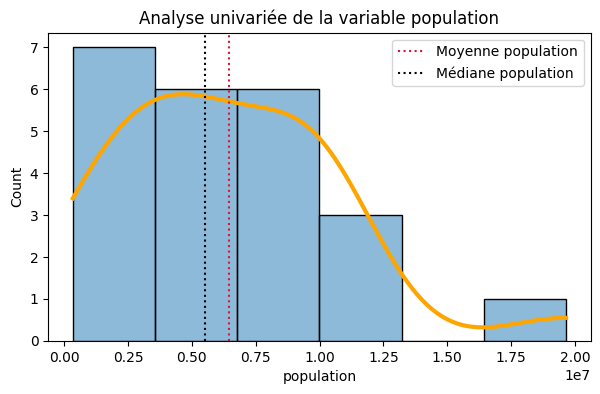

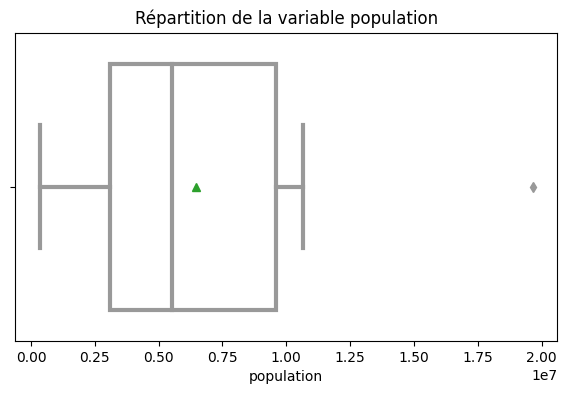



Analyse univariée pour la variable 'evolution_pop':
╒═══════════════╤═════════╤══════════╤═════════╤══════════╤══════════╤══════════╤═════════╤═════════╤═══════════╤════════════╕
│               │   count │     mean │     std │      min │      25% │      50% │     75% │     max │      skew │   kurtosis │
╞═══════════════╪═════════╪══════════╪═════════╪══════════╪══════════╪══════════╪═════════╪═════════╪═══════════╪════════════╡
│ evolution_pop │      23 │ 0.048009 │ 3.65776 │ -7.03048 │ -2.44492 │ 0.564591 │ 2.91624 │ 5.63688 │ -0.370192 │   -0.62132 │
╘═══════════════╧═════════╧══════════╧═════════╧══════════╧══════════╧══════════╧═════════╧═════════╧═══════════╧════════════╛


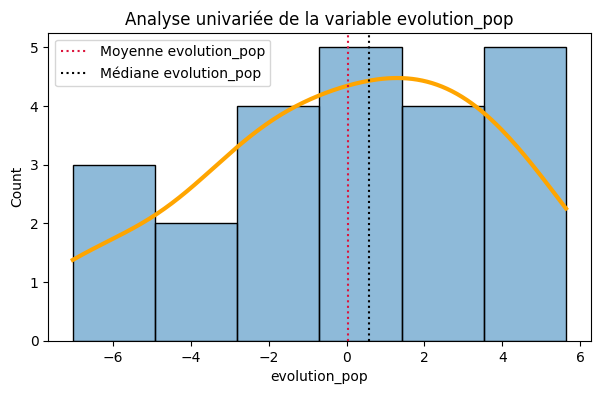

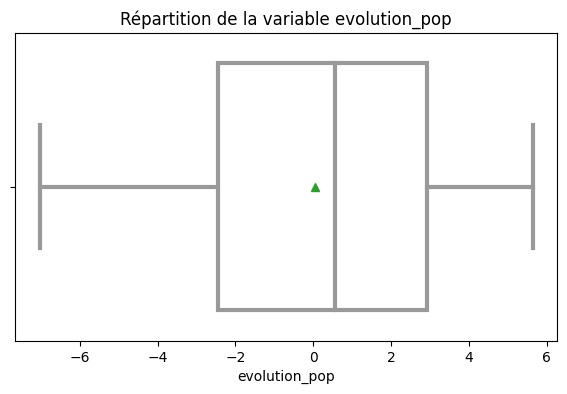



Analyse univariée pour la variable 'production':
╒════════════╤═════════╤════════╤════════╤═══════╤═════════╤════════╤════════╤════════╤═════════╤════════════╕
│            │   count │   mean │    std │   min │     25% │    50% │    75% │    max │    skew │   kurtosis │
╞════════════╪═════════╪════════╪════════╪═══════╪═════════╪════════╪════════╪════════╪═════════╪════════════╡
│ production │      23 │ 160880 │ 145726 │  9697 │ 67108.6 │ 128809 │ 160118 │ 493098 │ 1.38911 │   0.907764 │
╘════════════╧═════════╧════════╧════════╧═══════╧═════════╧════════╧════════╧════════╧═════════╧════════════╛


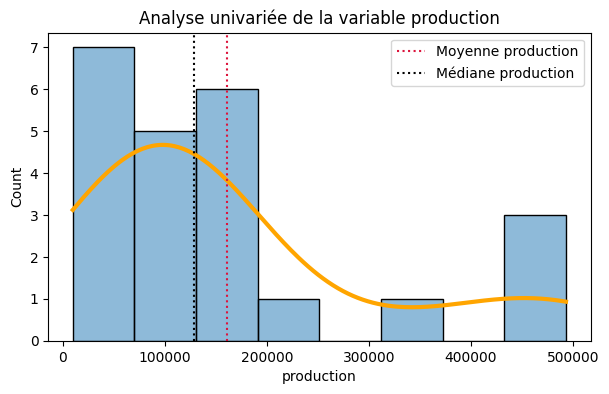

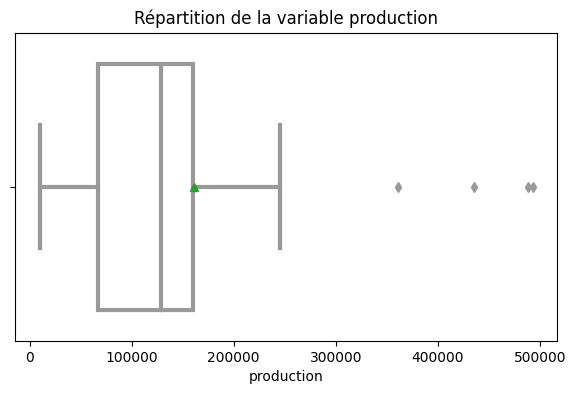



Analyse univariée pour la variable 'part_production':
╒═════════════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤══════════╤════════════╕
│                 │   count │    mean │     std │     min │     25% │     50% │     75% │     max │     skew │   kurtosis │
╞═════════════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪══════════╪════════════╡
│ part_production │      23 │ 36.5601 │ 15.0826 │ 8.37043 │ 28.4971 │ 35.7945 │ 49.6505 │ 70.4448 │ 0.132496 │ -0.0910171 │
╘═════════════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧══════════╧════════════╛


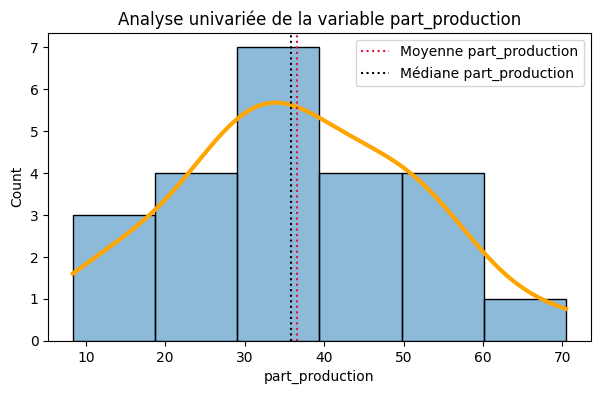

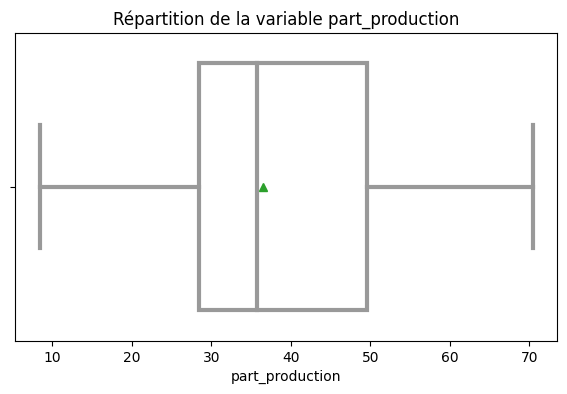



Analyse univariée pour la variable 'evolution_production':
╒══════════════════════╤═════════╤═════════╤═════════╤══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤════════════╕
│                      │   count │    mean │     std │      min │     25% │     50% │     75% │     max │    skew │   kurtosis │
╞══════════════════════╪═════════╪═════════╪═════════╪══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════════╡
│ evolution_production │      23 │ 20.5553 │ 25.1298 │ -19.2844 │ 5.66617 │ 15.1482 │ 23.8722 │ 108.357 │ 1.98691 │    6.24111 │
╘══════════════════════╧═════════╧═════════╧═════════╧══════════╧═════════╧═════════╧═════════╧═════════╧═════════╧════════════╛


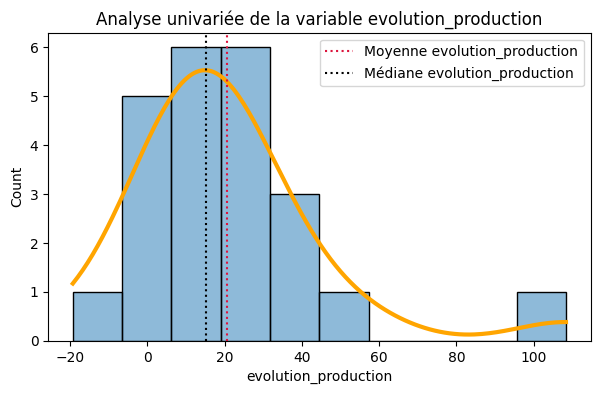

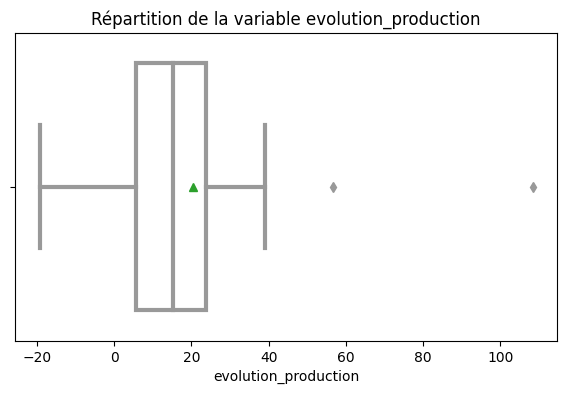



Analyse univariée pour la variable 'TDI':
╒═════╤═════════╤═════════╤═════════╤═════════╤═════════╤════════╤═════════╤═════════╤══════════╤════════════╕
│     │   count │    mean │     std │     min │     25% │    50% │     75% │     max │     skew │   kurtosis │
╞═════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════╪═════════╪═════════╪══════════╪════════════╡
│ TDI │      23 │ 45.9196 │ 26.8554 │ 1.96078 │ 23.5176 │ 44.382 │ 66.1868 │ 104.878 │ 0.351694 │  -0.474298 │
╘═════╧═════════╧═════════╧═════════╧═════════╧═════════╧════════╧═════════╧═════════╧══════════╧════════════╛


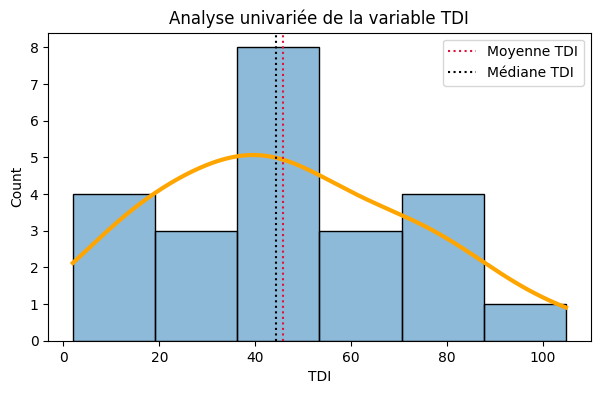

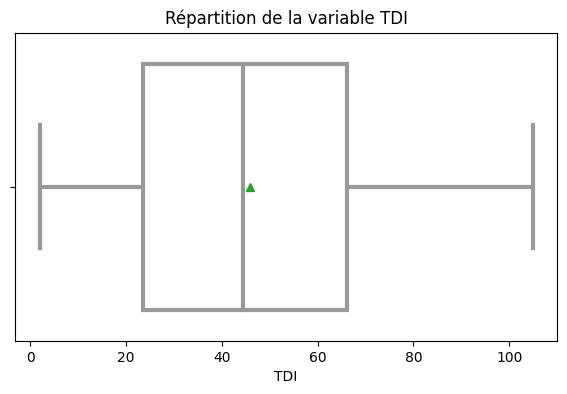



Analyse univariée pour la variable 'TAS':
╒═════╤═════════╤═════════╤═════════╤═════════╤═════════╤═══════╤═════════╤═════════╤══════════╤════════════╕
│     │   count │    mean │     std │     min │     25% │   50% │     75% │     max │     skew │   kurtosis │
╞═════╪═════════╪═════════╪═════════╪═════════╪═════════╪═══════╪═════════╪═════════╪══════════╪════════════╡
│ TAS │      23 │ 105.589 │ 33.8466 │ 65.4618 │ 82.2225 │   100 │ 125.886 │ 185.338 │ 0.858789 │   0.196834 │
╘═════╧═════════╧═════════╧═════════╧═════════╧═════════╧═══════╧═════════╧═════════╧══════════╧════════════╛


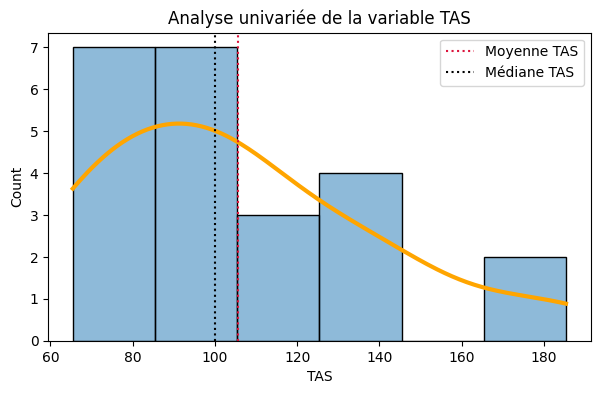

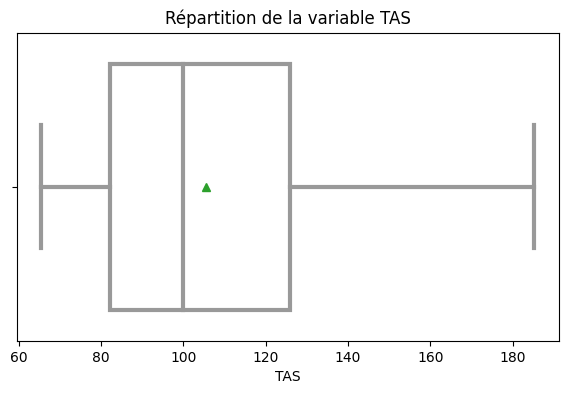



Analyse univariée pour la variable 'importation':
╒═════════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╤══════════╤════════════╕
│             │   count │    mean │     std │   min │   25% │   50% │   75% │   max │     skew │   kurtosis │
╞═════════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╪══════════╪════════════╡
│ importation │      23 │ 58.5217 │ 44.4224 │     2 │  20.5 │    51 │  91.5 │   146 │ 0.444547 │   -1.03797 │
╘═════════════╧═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╧══════════╧════════════╛


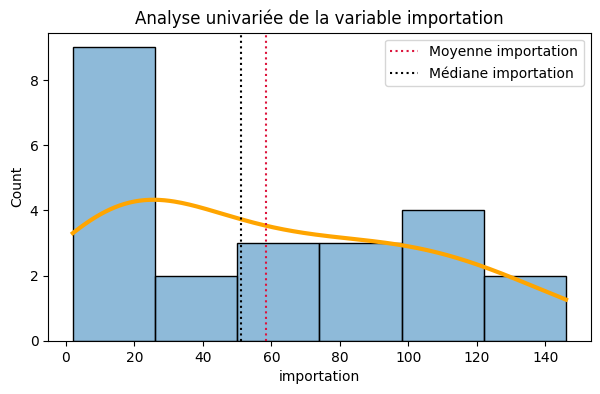

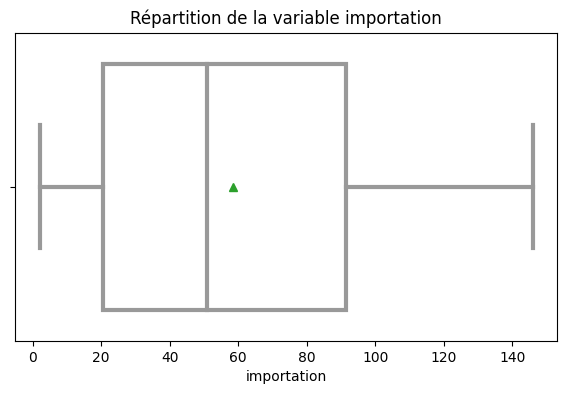



Analyse univariée pour la variable 'exportation':
╒═════════════╤═════════╤═════════╤════════╤═══════╤═══════╤═══════╤═══════╤═══════╤════════╤════════════╕
│             │   count │    mean │    std │   min │   25% │   50% │   75% │   max │   skew │   kurtosis │
╞═════════════╪═════════╪═════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪════════╪════════════╡
│ exportation │      23 │ 48.4348 │ 54.709 │     0 │  11.5 │    29 │  68.5 │   210 │ 1.6768 │    2.52907 │
╘═════════════╧═════════╧═════════╧════════╧═══════╧═══════╧═══════╧═══════╧═══════╧════════╧════════════╛


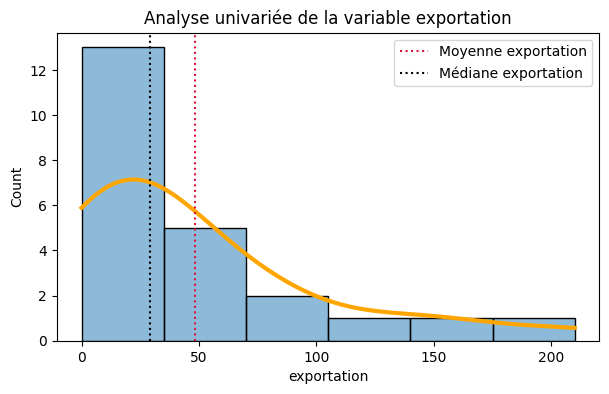

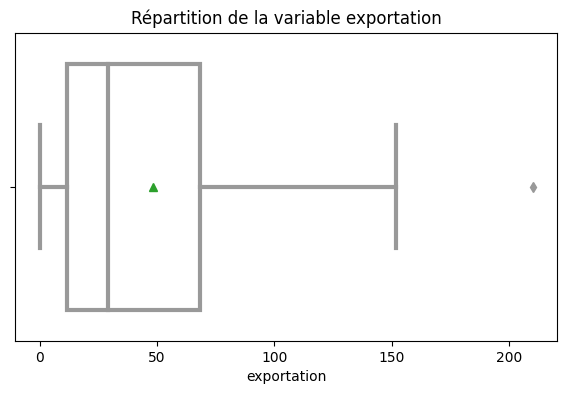



Analyse univariée pour la variable 'nourriture':
╒════════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╤══════════╤════════════╕
│            │   count │    mean │     std │   min │   25% │   50% │   75% │   max │     skew │   kurtosis │
╞════════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╪══════════╪════════════╡
│ nourriture │      23 │ 135.913 │ 98.2728 │    10 │  53.5 │   123 │   165 │   381 │ 0.907209 │   0.339978 │
╘════════════╧═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╧══════════╧════════════╛


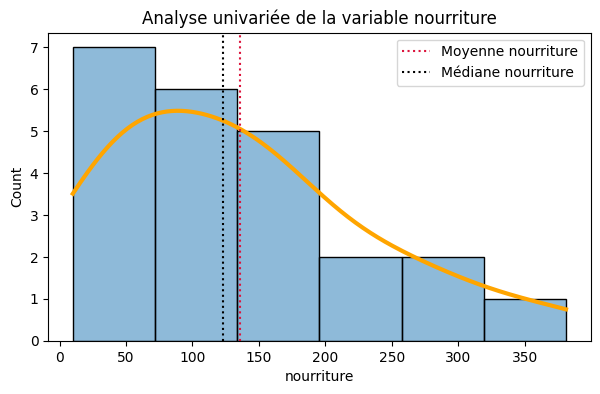

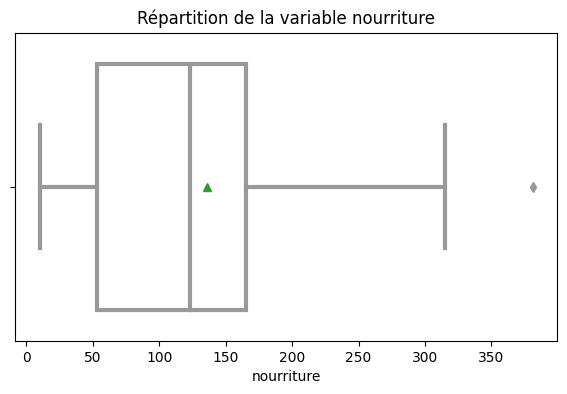



Analyse univariée pour la variable 'stabilite':
╒═══════════╤═════════╤══════════╤══════════╤═══════════╤══════════╤══════════╤═════════╤═════════╤═══════════╤════════════╕
│           │   count │     mean │      std │       min │      25% │      50% │     75% │     max │      skew │   kurtosis │
╞═══════════╪═════════╪══════════╪══════════╪═══════════╪══════════╪══════════╪═════════╪═════════╪═══════════╪════════════╡
│ stabilite │      23 │ 0.717138 │ 0.460518 │ -0.348211 │ 0.499913 │ 0.868219 │ 1.02441 │ 1.34803 │ -0.917538 │  0.0106558 │
╘═══════════╧═════════╧══════════╧══════════╧═══════════╧══════════╧══════════╧═════════╧═════════╧═══════════╧════════════╛


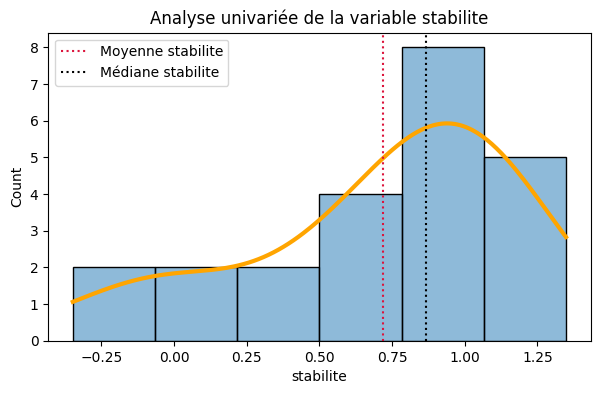

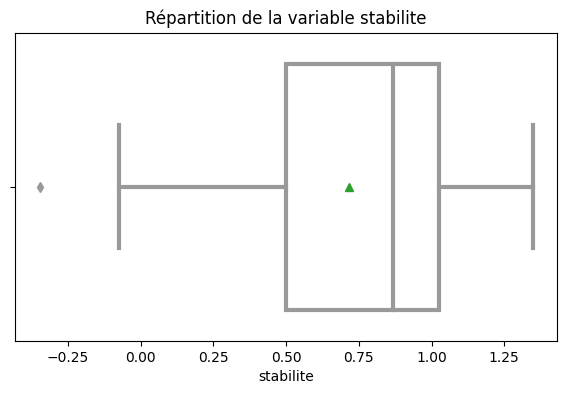



Analyse univariée pour la variable 'pib_hab':
╒═════════╤═════════╤═════════╤═════════╤═════════╤═══════╤═════════╤═════════╤═════════╤═════════╤════════════╕
│         │   count │    mean │     std │     min │   25% │     50% │     75% │     max │    skew │   kurtosis │
╞═════════╪═════════╪═════════╪═════════╪═════════╪═══════╪═════════╪═════════╪═════════╪═════════╪════════════╡
│ pib_hab │      23 │ 33267.9 │ 17137.3 │ 10069.2 │ 23046 │ 26298.8 │ 42577.8 │ 84056.3 │ 1.45453 │    2.28546 │
╘═════════╧═════════╧═════════╧═════════╧═════════╧═══════╧═════════╧═════════╧═════════╧═════════╧════════════╛


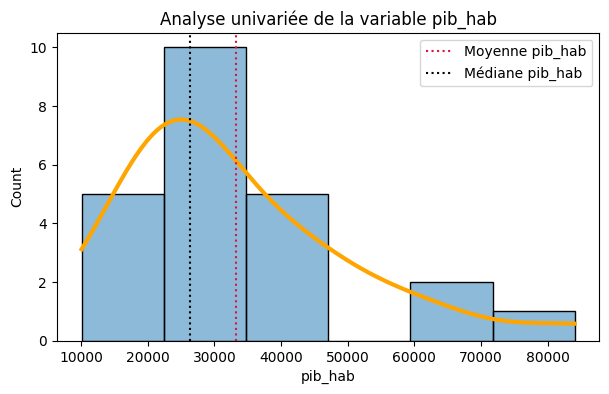

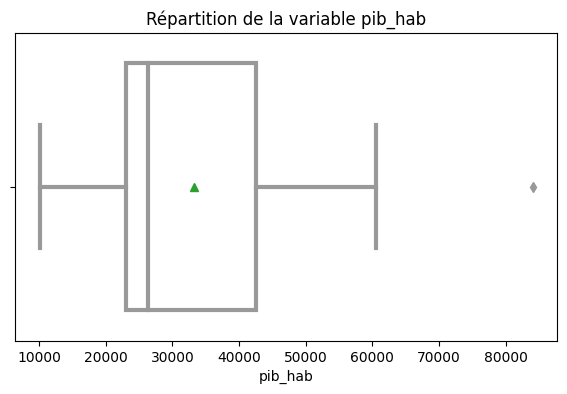



Analyse univariée pour la variable 'evolution_pib':
╒═══════════════╤═════════╤═════════╤═════════╤═══════════╤═════════╤═════════╤═════════╤═════════╤══════════╤════════════╕
│               │   count │    mean │     std │       min │     25% │     50% │     75% │     max │     skew │   kurtosis │
╞═══════════════╪═════════╪═════════╪═════════╪═══════════╪═════════╪═════════╪═════════╪═════════╪══════════╪════════════╡
│ evolution_pib │      23 │ 10.3546 │ 7.50018 │ -0.754013 │ 2.68101 │ 11.5544 │ 15.2827 │ 25.2649 │ 0.208883 │  -0.920843 │
╘═══════════════╧═════════╧═════════╧═════════╧═══════════╧═════════╧═════════╧═════════╧═════════╧══════════╧════════════╛


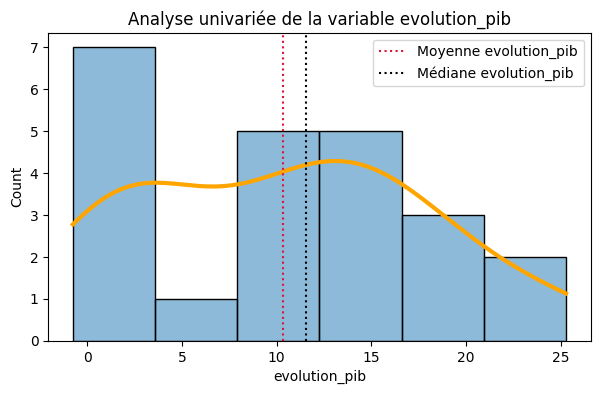

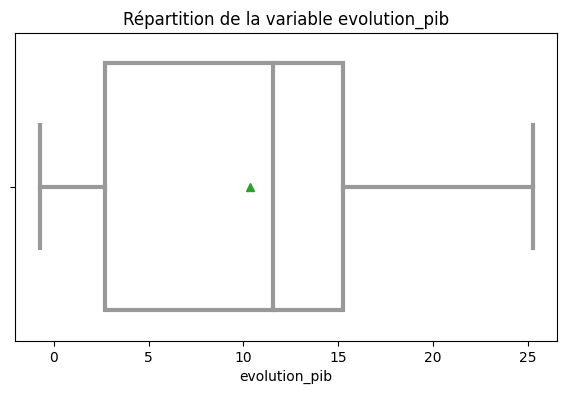



Analyse univariée pour la variable 'distance':
╒══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤══════════╤════════════╕
│          │   count │    mean │     std │     min │     25% │     50% │     75% │     max │     skew │   kurtosis │
╞══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪══════════╪════════════╡
│ distance │      23 │ 1573.39 │ 571.519 │ 464.652 │ 1116.42 │ 1635.63 │ 1908.49 │ 2882.69 │ 0.318275 │ -0.0975649 │
╘══════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧══════════╧════════════╛


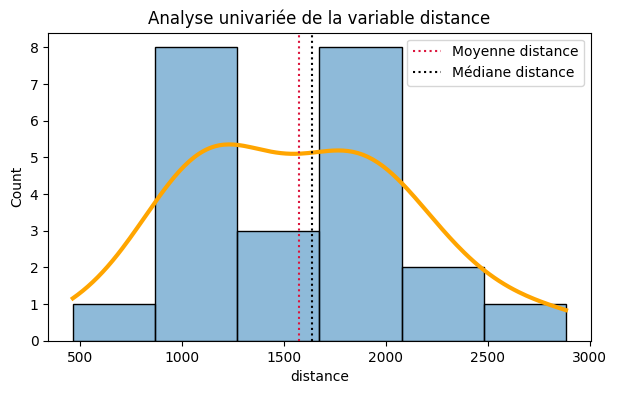

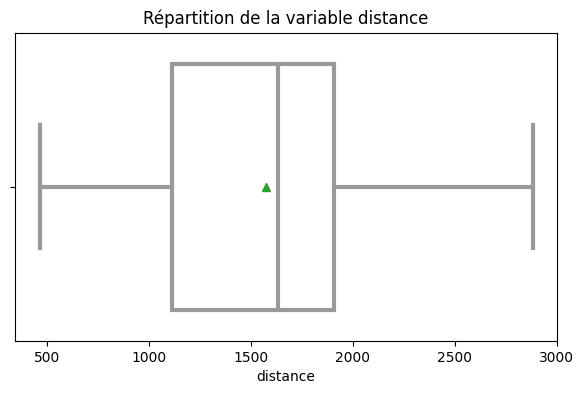



Analyse univariée pour la variable 'clusters_cah':
╒══════════════╤═════════╤════════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤════════╤════════════╕
│              │   count │   mean │   std │   min │   25% │   50% │   75% │   max │   skew │   kurtosis │
╞══════════════╪═════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪════════╪════════════╡
│ clusters_cah │      23 │      3 │     0 │     3 │     3 │     3 │     3 │     3 │      0 │          0 │
╘══════════════╧═════════╧════════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╧════════╧════════════╛


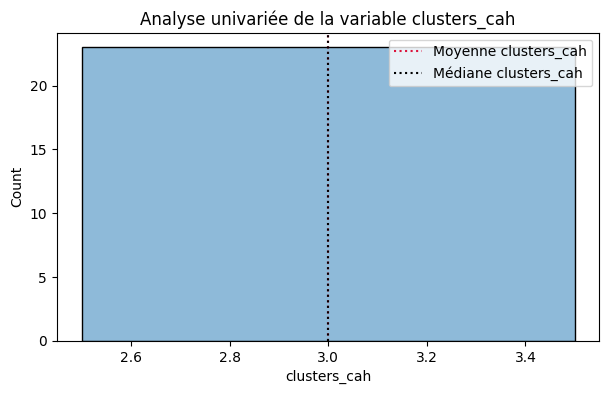

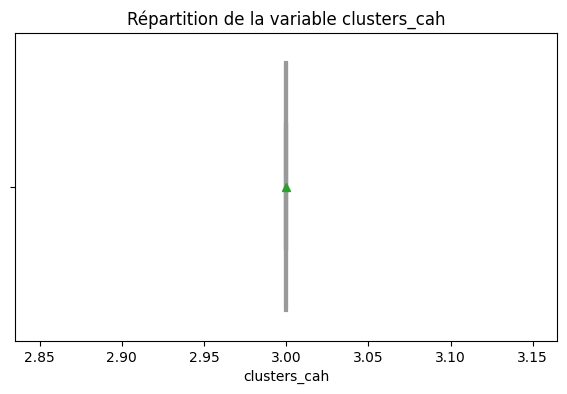



Analyse univariée pour la variable 'clusters_km':
╒═════════════╤═════════╤════════╤═══════╤═══════╤═══════╤═══════╤═══════╤═══════╤════════╤════════════╕
│             │   count │   mean │   std │   min │   25% │   50% │   75% │   max │   skew │   kurtosis │
╞═════════════╪═════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪════════╪════════════╡
│ clusters_km │      23 │      1 │     0 │     1 │     1 │     1 │     1 │     1 │      0 │          0 │
╘═════════════╧═════════╧════════╧═══════╧═══════╧═══════╧═══════╧═══════╧═══════╧════════╧════════════╛


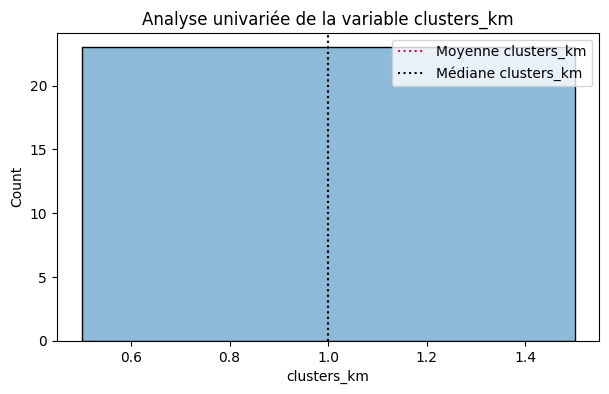

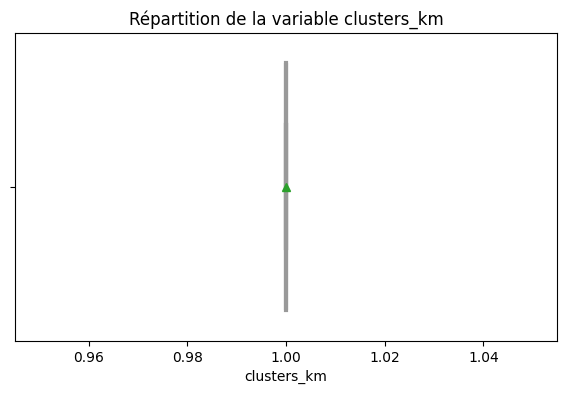

In [137]:
analyse_univariee(df_choix_pays)

*****